# Lending Club Case Study

In [1]:
# Importing all the required Libraries
import pandas as pd
import numpy as np
from numpy import median
from numpy import mean
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
# Reading the CSV file
pd.set_option("max_columns", None)
df = pd.read_csv('C:\\Users\\medha\\Downloads\\loan\\loan.csv', dtype='unicode')
df.head(10)

id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0  1077501   1296599      5000        5000            4975   36 months   
1  1077430   1314167      2500        2500            2500   60 months   
2  1077175   1313524      2400        2400            2400   36 months   
3  1076863   1277178     10000       10000           10000   36 months   
4  1075358   1311748      3000        3000            3000   60 months   
5  1075269   1311441      5000        5000            5000   36 months   
6  1069639   1304742      7000        7000            7000   60 months   
7  1072053   1288686      3000        3000            3000   36 months   
8  1071795   1306957      5600        5600            5600   60 months   
9  1071570   1306721      5375        5375            5350   60 months   

  int_rate installment grade sub_grade                  emp_title emp_length  \
0   10.65%      162.87     B        B2                        NaN  10+ years   
1   15.27%       59.83     C        C4                      Ryder   < 1 year   
2   15.96%       84.33     C        C5                        NaN  10+ years   
3   13.49%      339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4   12.69%       67.79     B        B5   University Medical Group     1 year   
5    7.90%      156.46     A        A4       Veolia Transportaton    3 years   
6   15.96%      170.08     C        C5  Southern Star Photography    8 years   
7   18.64%      109.43     E        E1            MKC Accounting     9 years   
8   21.28%      152.39     F        F2                        NaN    4 years   
9   12.69%      121.45     B        B5                  Starbucks   < 1 year   

  home_ownership annual_inc verification_status issue_d  loan_status  \
0           RENT      24000            Verified  Dec-11   Fully Paid   
1           RENT      30000     Source Verified  Dec-11  Charged Off   
2           RENT      12252        Not Verified  Dec-11   Fully Paid   
3           RENT      49200     Source Verified  Dec-11   Fully Paid   
4           RENT      80000     Source Verified  Dec-11      Current   
5           RENT      36000     Source Verified  Dec-11   Fully Paid   
6           RENT      47004        Not Verified  Dec-11   Fully Paid   
7           RENT      48000     Source Verified  Dec-11   Fully Paid   
8            OWN      40000     Source Verified  Dec-11  Charged Off   
9           RENT      15000            Verified  Dec-11  Charged Off   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   
6          n  https://lendingclub.com/browse/loanDetail.acti...   
7          n  https://lendingclub.com/browse/loanDetail.acti...   
8          n  https://lendingclub.com/browse/loanDetail.acti...   
9          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7    Borrower added on 12/16/11 > Downpayment for...                 car   
8    Borrower added on 12/21/11 > I own a small h...      small_business   
9    Borrower added o

In [3]:
# Checking the shape of the dataframe
df.shape

(39717, 111)

In [4]:
# Finding the data type for each column in our dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   id                              object
 1   member_id                       object
 2   loan_amnt                       object
 3   funded_amnt                     object
 4   funded_amnt_inv                 object
 5   term                            object
 6   int_rate                        object
 7   installment                     object
 8   grade                           object
 9   sub_grade                       object
 10  emp_title                       object
 11  emp_length                      object
 12  home_ownership                  object
 13  annual_inc                      object
 14  verification_status             object
 15  issue_d                         object
 16  loan_status                     object
 17  pymnt_plan                      object
 18  url  

In [5]:
# Checking for Null Values
pd.set_option("max_rows", None)
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [7]:
# Checking the Null Value as a percentage of the whole dataframe
pd.set_option("max_rows", None)
round(100*(df.isnull().sum()/len(df.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

From here we can see a lot of columns are completely empty. Thus we are droping them from the dataframe.

In [8]:
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



## Data Cleanup

In [9]:
# Dropping the empty columns
df = df.dropna(axis=1, how = 'all')
df

id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0      1077501   1296599      5000        5000            4975   36 months   
1      1077430   1314167      2500        2500            2500   60 months   
2      1077175   1313524      2400        2400            2400   36 months   
3      1076863   1277178     10000       10000           10000   36 months   
4      1075358   1311748      3000        3000            3000   60 months   
...        ...       ...       ...         ...             ...         ...   
39712    92187     92174      2500        2500            1075   36 months   
39713    90665     90607      8500        8500             875   36 months   
39714    90395     90390      5000        5000            1325   36 months   
39715    90376     89243      5000        5000             650   36 months   
39716    87023     86999      7500        7500             800   36 months   

      int_rate installment grade sub_grade  ... next_pymnt_d  \
0       10.65%      162.87     B        B2  ...          NaN   
1       15.27%       59.83     C        C4  ...          NaN   
2       15.96%       84.33     C        C5  ...          NaN   
3       13.49%      339.31     C        C1  ...          NaN   
4       12.69%       67.79     B        B5  ...       Jun-16   
...        ...         ...   ...       ...  ...          ...   
39712    8.07%       78.42     A        A4  ...          NaN   
39713   10.28%      275.38     C        C1  ...          NaN   
39714    8.07%      156.84     A        A4  ...          NaN   
39715    7.43%      155.38     A        A2  ...          NaN   
39716   13.75%      255.43     E        E2  ...          NaN   

      last_credit_pull_d collections_12_mths_ex_med policy_code  \
0                 May-16                          0           1   
1                 Sep-13                          0           1   
2                 May-16                          0           1   
3                 Apr-16                          0           1   
4                 May-16                          0           1   
...                  ...                        ...         ...   
39712             Jun-10                        NaN           1   
39713             Jul-10                        NaN           1   
39714             Jun-07                        NaN           1   
39715             Jun-07                        NaN           1   
39716             Jun-10                        NaN           1   

      application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
0           INDIVIDUAL              0                        0           0   
1           INDIVIDUAL              0                        0           0   
2           INDIVIDUAL              0                        0           0   
3           INDIVIDUAL              0                        0           0   
4           INDIVIDUAL              0                        0           0   
...                ...            ...                      ...         ...   
39712       INDIVIDUAL              0                      NaN           0   
39713       INDIVIDUAL              0                      NaN           0   
39714       INDIVIDUAL              0                      NaN           0   
39715       INDIVIDUAL              0                      NaN           0   
39716       INDIVIDUAL              0                      NaN           0   

      pub_rec_bankruptcies tax_liens  
0                        0         0  
1                        0         0  
2                        0         0  
3                        0         0  
4                        0         0  
...                    ...       ...  
39712                  NaN       NaN  
39713                  NaN       NaN  
39714                  NaN       NaN  
39715                  NaN       NaN  
39716                  NaN       NaN  

[39717 rows x 57 columns]

In [10]:
# Again cheking for the null value columns
pd.set_option("max_rows", None)
round(100*(df.isnull().sum()/len(df.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [12]:
# These column are mostly empty thus droping these columns
df = df.drop(columns=['mths_since_last_record', 'next_pymnt_d'])

In [13]:
# Checking for number of unique values in each column
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [14]:
# These column have only have 1 value thus droping these columns
df = df.drop(columns=['pymnt_plan', 'initial_list_status','out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'])

In [15]:
#Identify null fields in data set
pd.set_option("max_rows", None)
round(100*(df.isnull().sum()/len(df.index)),2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
open_acc                    0.00
pub_rec                     0.00
revol_bal 

In [16]:
#checking data frame shape after null fields identification
pd.reset_option('all')
df.shape


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



(39717, 44)

In [17]:
# These are irrelevent to the problem statement so we are dropping these columns 
df = df.drop(columns=['id','member_id','funded_amnt','funded_amnt_inv','emp_title','url','desc','title','zip_code','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','open_acc','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_credit_pull_d','total_pymnt_inv'])
df.shape

(39717, 23)

In [18]:
# Checking the data frame again
df.head(10)

loan_amnt        term int_rate installment grade sub_grade emp_length  \
0      5000   36 months   10.65%      162.87     B        B2  10+ years   
1      2500   60 months   15.27%       59.83     C        C4   < 1 year   
2      2400   36 months   15.96%       84.33     C        C5  10+ years   
3     10000   36 months   13.49%      339.31     C        C1  10+ years   
4      3000   60 months   12.69%       67.79     B        B5     1 year   
5      5000   36 months    7.90%      156.46     A        A4    3 years   
6      7000   60 months   15.96%      170.08     C        C5    8 years   
7      3000   36 months   18.64%      109.43     E        E1    9 years   
8      5600   60 months   21.28%      152.39     F        F2    4 years   
9      5375   60 months   12.69%      121.45     B        B5   < 1 year   

  home_ownership annual_inc verification_status  ... addr_state    dti  \
0           RENT      24000            Verified  ...         AZ  27.65   
1           RENT      30000     Source Verified  ...         GA      1   
2           RENT      12252        Not Verified  ...         IL   8.72   
3           RENT      49200     Source Verified  ...         CA     20   
4           RENT      80000     Source Verified  ...         OR  17.94   
5           RENT      36000     Source Verified  ...         AZ   11.2   
6           RENT      47004        Not Verified  ...         NC  23.51   
7           RENT      48000     Source Verified  ...         CA   5.35   
8            OWN      40000     Source Verified  ...         CA   5.55   
9           RENT      15000            Verified  ...         TX  18.08   

  delinq_2yrs pub_rec revol_bal revol_util total_acc  total_pymnt  \
0           0       0     13648     83.70%         9  5863.155187   
1           0       0      1687      9.40%         4      1008.71   
2           0       0      2956     98.50%        10  3005.666844   
3           0       0      5598        21%        37     12231.89   
4           0       0     27783     53.90%        38      3513.33   
5           0       0      7963     28.30%        12      5632.21   
6           0       0     17726     85.60%        11     10110.84   
7           0       0      8221     87.50%         4  3939.135294   
8           0       0      5210     32.60%        13       646.02   
9           0       0      9279     36.50%         3      1476.19   

  last_pymnt_amnt pub_rec_bankruptcies  
0          171.62                    0  
1          119.66                    0  
2          649.91                    0  
3          357.48                    0  
4           67.79                    0  
5          161.03                    0  
6         1313.76                    0  
7          111.34                    0  
8          152.39                    0  
9          121.45                    0  

[10 rows x 23 columns]

In [19]:
# Checking the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   loan_amnt             39717 non-null  object
 1   term                  39717 non-null  object
 2   int_rate              39717 non-null  object
 3   installment           39717 non-null  object
 4   grade                 39717 non-null  object
 5   sub_grade             39717 non-null  object
 6   emp_length            38642 non-null  object
 7   home_ownership        39717 non-null  object
 8   annual_inc            39717 non-null  object
 9   verification_status   39717 non-null  object
 10  issue_d               39717 non-null  object
 11  loan_status           39717 non-null  object
 12  purpose               39717 non-null  object
 13  addr_state            39717 non-null  object
 14  dti                   39717 non-null  object
 15  delinq_2yrs           39717 non-null

## Now let us convert the columns to appropriate data type for further analysis

<h3>Loan Amount</h3>

In [20]:
# Checking the value counts and for null values in 'loan_amnt' column
df['loan_amnt'].value_counts(dropna=False)

10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
16325       1
27175       1
12975       1
23475       1
34525       1
Name: loan_amnt, Length: 885, dtype: int64

In [21]:
# Checking the datatype of 'loan_amnt' column
df['loan_amnt'].describe()

count     39717
unique      885
top       10000
freq       2833
Name: loan_amnt, dtype: object

In [22]:
# Converting the 'loan_amnt' frpm object type into int
df['loan_amnt'] = df['loan_amnt'].astype(int)
df['loan_amnt']

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 39717, dtype: int32

<h3>Term</h3>

In [23]:
# Checking the value count and for null values in 'term' column
df['term'].value_counts(dropna=False)

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [24]:
# Stripping the string months from all the values in the column
df['term'] = df['term'].str.strip('months').str.replace(" ","")
df['term'].value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [25]:
# Converting 'term' from object type into int
df['term'] = df['term'].astype(int)
df['term']

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int32

<h3>Interest Rate</h3>

In [26]:
# Checking the value count and null values in 'int_rate' column
df['int_rate'].value_counts(dropna=False)

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
24.59%      1
18.36%      1
17.54%      1
16.15%      1
17.34%      1
Name: int_rate, Length: 371, dtype: int64

In [27]:
# Stripping the % from all the values in the column
df['int_rate'] = df['int_rate'].str.strip('%').str.replace(" ","")
df['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.72      1
17.54      1
16.15      1
17.46      1
21.48      1
Name: int_rate, Length: 371, dtype: int64

In [28]:
# Converting 'int rate' from object type to float
df['int_rate'] = df['int_rate'].astype(float)
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

<h3>Installment</h3>

In [29]:
# Checking the value count and null values in 'installment' column
df['installment'].value_counts(dropna=False)

311.11    68
180.96    59
311.02    54
150.8     48
368.45    46
          ..
196.11     1
74.67      1
249.09     1
272.24     1
204.96     1
Name: installment, Length: 15383, dtype: int64

In [30]:
# Converting 'int rate' from object type to float
df['installment'] = df['installment'].astype(float)
df['installment']

0        162.87
1         59.83
2         84.33
3        339.31
4         67.79
          ...  
39712     78.42
39713    275.38
39714    156.84
39715    155.38
39716    255.43
Name: installment, Length: 39717, dtype: float64

<h3>Grade</h3>

In [31]:
# Checking the unique values in 'grade' column
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

<h3>Sub Grade</h3>

In [32]:
# Checking the unique values in 'sub_grade' column
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

<h3>Employee Length</h3>

In [33]:
# Checking the value count and null values in 'emp_length' column
df['emp_length'].value_counts(dropna=False)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

In [34]:
# Stripping years, + and <  from all the values in the column
df['emp_length'] = df['emp_length'].str.strip('years').str.strip('<').str.replace(" ","").str.rstrip('+')
df['emp_length'].value_counts(dropna=False)

10     8879
1      7823
2      4388
3      4095
4      3436
5      3282
6      2229
7      1773
8      1479
9      1258
NaN    1075
Name: emp_length, dtype: int64

In [35]:
# Removing the rows where emp_length is null
df = df[~(df['emp_length'].isnull())]
df

loan_amnt  term  int_rate  installment grade sub_grade emp_length  \
0           5000    36     10.65       162.87     B        B2         10   
1           2500    60     15.27        59.83     C        C4          1   
2           2400    36     15.96        84.33     C        C5         10   
3          10000    36     13.49       339.31     C        C1         10   
4           3000    60     12.69        67.79     B        B5          1   
...          ...   ...       ...          ...   ...       ...        ...   
39712       2500    36      8.07        78.42     A        A4          4   
39713       8500    36     10.28       275.38     C        C1          3   
39714       5000    36      8.07       156.84     A        A4          1   
39715       5000    36      7.43       155.38     A        A2          1   
39716       7500    36     13.75       255.43     E        E2          1   

      home_ownership annual_inc verification_status  ... addr_state    dti  \
0               RENT      24000            Verified  ...         AZ  27.65   
1               RENT      30000     Source Verified  ...         GA      1   
2               RENT      12252        Not Verified  ...         IL   8.72   
3               RENT      49200     Source Verified  ...         CA     20   
4               RENT      80000     Source Verified  ...         OR  17.94   
...              ...        ...                 ...  ...        ...    ...   
39712       MORTGAGE     110000        Not Verified  ...         CO  11.33   
39713           RENT      18000        Not Verified  ...         NC    6.4   
39714       MORTGAGE      1e+05        Not Verified  ...         MA    2.3   
39715       MORTGAGE      2e+05        Not Verified  ...         MD   3.72   
39716            OWN      22000        Not Verified  ...         MA  14.29   

      delinq_2yrs pub_rec revol_bal revol_util total_acc  total_pymnt  \
0               0       0     13648     83.70%         9  5863.155187   
1               0       0      1687      9.40%         4      1008.71   
2               0       0      2956     98.50%        10  3005.666844   
3               0       0      5598        21%        37     12231.89   
4               0       0     27783     53.90%        38      3513.33   
...           ...     ...       ...        ...       ...          ...   
39712           0       0      7274     13.10%        40  2822.969293   
39713           1       0      8847     26.90%         9  9913.491822   
39714           0       0      9698     19.40%        20  5272.161128   
39715           0       0     85607      0.70%        26  5174.198551   
39716           1       0      4175     51.50%         8  9195.263334   

      last_pymnt_amnt pub_rec_bankruptcies  
0              171.62                    0  
1              119.66                    0  
2              649.91                    0  
3              357.48                    0  
4               67.79                    0  
...               ...                  ...  
39712            80.9                  NaN  
39713          281.94                  NaN  
39714               0                  NaN  
39715               0                  NaN  
39716          256.59                  NaN  

[38642 rows x 23 columns]

In [36]:
# Converting 'emp_length' into int values
df['emp_length'] = df['emp_length'].astype(int)
df['emp_length'].value_counts(dropna=False)

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

<h3>Home Ownership</h3>

In [37]:
# Checking the value count and null values in 'home_ownership' column
df['home_ownership'].value_counts(dropna=False)

RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [38]:
# Rows where home ownership is NONE 
df[df['home_ownership'] == 'NONE']

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
39318      10000    36      7.75       312.22     A        A3           5   
39659       4000    36      9.64       128.41     B        B4           1   
39660       2800    36      8.70        88.65     B        B1           1   

      home_ownership annual_inc verification_status  ... addr_state   dti  \
39318           NONE      22200        Not Verified  ...         VA  5.24   
39659           NONE      1e+05        Not Verified  ...         CA    15   
39660           NONE     120000        Not Verified  ...         MA    15   

      delinq_2yrs pub_rec revol_bal revol_util total_acc  total_pymnt  \
39318           0       0      4767      8.70%        22  11239.62089   
39659           0       0      8155     14.90%         8  4622.489229   
39660           0       0      8155     14.90%         8  3191.218575   

      last_pymnt_amnt pub_rec_bankruptcies  
39318          313.59                  NaN  
39659          129.76                  NaN  
39660            89.8                  NaN  

[3 rows x 23 columns]

In [39]:
# Imputing the value of NONE to OTHER
df['home_ownership'] = df['home_ownership'].replace(['NONE'],'OTHER')

In [40]:
# Checking the value count again
df['home_ownership'].value_counts(dropna=False)

RENT        18488
MORTGAGE    17212
OWN          2841
OTHER         101
Name: home_ownership, dtype: int64

<h3>Annual Income</h3>

In [41]:
# Checking the value count and null values in 'annual_inc' column
df['annual_inc'].value_counts(dropna= False)

60000       1472
50000       1036
40000        859
45000        813
75000        803
            ... 
65760          1
72972.35       1
25740          1
132650         1
110196         1
Name: annual_inc, Length: 5100, dtype: int64

In [42]:
#Converting type to float
df['annual_inc'] = df['annual_inc'].astype(float)
df['annual_inc']

0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 38642, dtype: float64

<h3>Verification Status</h3>

In [43]:
# Checking the value count and null values in 'verification_status' column
df['verification_status'].value_counts(dropna = False)

Not Verified       16498
Verified           12353
Source Verified     9791
Name: verification_status, dtype: int64

In [44]:
df['verification_status'].describe()

count            38642
unique               3
top       Not Verified
freq             16498
Name: verification_status, dtype: object

<h3>Loan Issue Date</h3>

In [45]:
# Checking the value count and null values in 'issue_d' column
df['issue_d'].value_counts(dropna = False)

Dec-11    2207
Nov-11    2124
Oct-11    2028
Sep-11    1985
Aug-11    1873
Jul-11    1793
Jun-11    1771
May-11    1632
Apr-11    1508
Mar-11    1403
Jan-11    1336
Feb-11    1239
Dec-10    1220
Nov-10    1096
Jul-10    1092
Oct-10    1086
Sep-10    1058
Aug-10    1058
Jun-10     996
May-10     894
Apr-10     806
Mar-10     718
Feb-10     605
Nov-09     602
Dec-09     598
Jan-10     585
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
Aug-08      71
May-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [46]:
# Checking the 'issue_d' data type
df['issue_d'].describe()

count      38642
unique        55
top       Dec-11
freq        2207
Name: issue_d, dtype: object

In [47]:
# Converting the 'issue_d' to Datetime format
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['issue_d'].value_counts(dropna=False)

2011-12-01    2207
2011-11-01    2124
2011-10-01    2028
2011-09-01    1985
2011-08-01    1873
2011-07-01    1793
2011-06-01    1771
2011-05-01    1632
2011-04-01    1508
2011-03-01    1403
2011-01-01    1336
2011-02-01    1239
2010-12-01    1220
2010-11-01    1096
2010-07-01    1092
2010-10-01    1086
2010-09-01    1058
2010-08-01    1058
2010-06-01     996
2010-05-01     894
2010-04-01     806
2010-03-01     718
2010-02-01     605
2009-11-01     602
2009-12-01     598
2010-01-01     585
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     171
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2007-08-01      33
2008-09-01      32
2007-07-01  

<h3>Derived Column - Issue Year</h3>

In [48]:
# Creating new column for the year on which the loan was issued
df['issue_year'] = df['issue_d'].dt.year
df['issue_year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 38642, dtype: int64

<h3>Derived Column - Issue Month</h3>

In [49]:
# Creating new column for the month on which the loan was issued
df['issue_month'] = df['issue_d'].dt.month
df['issue_month']

0        12
1        12
2        12
3        12
4        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issue_month, Length: 38642, dtype: int64

<h3>Loan Status</h3>

In [50]:
# Checking the value count and null values in 'loan_status' column
df['loan_status'].value_counts(dropna=False)

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [51]:
# Converting the values in 'loan_status' column to lower string
df['loan_status'] = df['loan_status'].str.lower()

In [52]:
# Removing the members who are currently paying up the loans
df = df[~(df['loan_status'] == 'current')]

In [53]:
# Again Checking the value count of 'loan_status' column
df['loan_status'].value_counts()

fully paid     32145
charged off     5399
Name: loan_status, dtype: int64

<h3>Derived Column - Default Rate</h3>

In [54]:
# Creating a new Column 'default_rate' which have values of 0 = 'fully paid' and 1 = 'charged off'
df['default_rate'] = df['loan_status']
df['default_rate'] = df['default_rate'].replace(['fully paid'],'0')
df['default_rate'] = df['default_rate'].replace(['charged off'],'1')

In [55]:
# Converting 'default_rate' column into int
df['default_rate'] = df['default_rate'].astype(int)
df['default_rate'].value_counts(dropna= False)

0    32145
1     5399
Name: default_rate, dtype: int64

<h3>Purpose</h3>

In [56]:
# Checking the value count and null values in 'purpose' column
df['purpose'].value_counts(dropna= False)

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

<h3>State Code</h3>

In [57]:
# Checking the value count and null values in 'addr_state' column
df['addr_state'].value_counts(dropna=False)

CA    6768
NY    3599
FL    2694
TX    2605
NJ    1768
IL    1442
PA    1437
VA    1340
GA    1319
MA    1268
OH    1146
MD    1005
AZ     806
WA     783
CO     744
NC     726
CT     707
MI     671
MO     647
MN     583
NV     464
SC     451
WI     426
OR     421
AL     418
LA     417
KY     307
OK     282
UT     247
KS     244
AR     227
DC     211
RI     192
NM     179
WV     164
HI     162
NH     157
DE     110
MT      77
WY      76
AK      76
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

<h3>DTI - Debt to Income Ratio</h3>

In [58]:
# Checking the value count and null values in 'dti' column
df['dti'].value_counts(dropna = False)

0        168
12        44
18        44
19.2      39
13.2      38
        ... 
25.01      1
26.91      1
28.61      1
28.26      1
27.69      1
Name: dti, Length: 2848, dtype: int64

In [59]:
# Converting 'dti' column into float
df['dti'] = df['dti'].astype(float)
df['dti']

0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 37544, dtype: float64

<h3>Delinquency for 2yrs</h3>

In [60]:
# Checking the value count and null values in 'delinq_2yrs' column
df['delinq_2yrs'].value_counts(dropna=False)

0     33453
1      3134
2       653
3       206
4        59
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

In [61]:
# Converting 'deling_2yrs' into int
df['delinq_2yrs'] = df['delinq_2yrs'].astype(int)
df['delinq_2yrs']

0        0
1        0
2        0
3        0
5        0
        ..
39712    0
39713    1
39714    0
39715    0
39716    1
Name: delinq_2yrs, Length: 37544, dtype: int32

<h3>Public Record of Derogitory Behaviour</h3>

In [62]:
# Checking the value count and null values in 'pub_rec' column
df['pub_rec'].value_counts(dropna = False)

0    35593
1     1896
2       46
3        7
4        2
Name: pub_rec, dtype: int64

In [63]:
# Converting 'pub_rec' column into int
df['pub_rec'] = df['pub_rec'].astype(int)
df['pub_rec']

0        0
1        0
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: pub_rec, Length: 37544, dtype: int32

<h3>Revolving Balance</h3>

In [64]:
# Checking the value count and null values in 'revol_bal' column
df['revol_bal'].value_counts(dropna = False)

0        937
298       14
255       14
1         11
682       10
        ... 
2908       1
15013      1
44333      1
16521      1
20133      1
Name: revol_bal, Length: 21000, dtype: int64

In [65]:
# Converting 'revol_bal' into int
df['revol_bal'] = df['revol_bal'].astype(int)
df['revol_bal']

0        13648
1         1687
2         2956
3         5598
5         7963
         ...  
39712     7274
39713     8847
39714     9698
39715    85607
39716     4175
Name: revol_bal, Length: 37544, dtype: int32

<h3>Revolving Line Utilization Rate</h3>

In [66]:
# Checking the value count and null values in 'revol_util' column
df['revol_util'].value_counts(dropna = False)

0%        918
0.20%      61
63%        61
40.70%     56
31.20%     55
         ... 
2.64%       1
1.88%       1
29.53%      1
32.04%      1
7.43%       1
Name: revol_util, Length: 1087, dtype: int64

In [67]:
# Striping % from the values
df['revol_util'] = df['revol_util'].str.strip('%')
df['revol_util']

0        83.70
1         9.40
2        98.50
3           21
5        28.30
         ...  
39712    13.10
39713    26.90
39714    19.40
39715     0.70
39716    51.50
Name: revol_util, Length: 37544, dtype: object

In [68]:
# Converting 'revol_util' column into float
df['revol_util'] = df['revol_util'].astype(float)

In [69]:
# Checking for null values
df['revol_util'].isnull().sum()

47

In [70]:
#descrive revol util
df['revol_util'].describe()

count    37497.000000
mean        48.861742
std         28.341493
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [71]:
# Imputing the null values with the mean
mean_value = df['revol_util'].mean()
df['revol_util'] = df['revol_util'].fillna(mean_value)

In [72]:
# Again Checking for null values
df['revol_util'].isnull().sum()

0

<h3>Total Number of Credit Lines</h3>

In [73]:
# Checking the value count and null values in 'total_acc' column
df['total_acc'].value_counts(dropna = False)

16    1392
15    1381
17    1367
14    1367
20    1362
      ... 
77       1
78       1
80       1
74       1
71       1
Name: total_acc, Length: 82, dtype: int64

In [74]:
# Converting 'total_acc' into int
df['total_acc'] = df['total_acc'].astype(int)
df['total_acc']

0         9
1         4
2        10
3        37
5        12
         ..
39712    40
39713     9
39714    20
39715    26
39716     8
Name: total_acc, Length: 37544, dtype: int32

<h3>Total Payment</h3>

In [75]:
# Checking the value count and null values in 'total_pymnt' column
df['total_pymnt'].value_counts()

11196.56943    26
11784.23223    16
13148.13786    15
0              15
13435.90021    13
               ..
2222.16         1
4186.923804     1
6679.488143     1
9272.73         1
16999.26877     1
Name: total_pymnt, Length: 35800, dtype: int64

In [76]:
# Converting 'total_pymnt' into float
df['total_pymnt'] = df['total_pymnt'].astype(float)
df['total_pymnt']

0         5863.155187
1         1008.710000
2         3005.666844
3        12231.890000
5         5632.210000
             ...     
39712     2822.969293
39713     9913.491822
39714     5272.161128
39715     5174.198551
39716     9195.263334
Name: total_pymnt, Length: 37544, dtype: float64

<h3>Last Payment Amount</h3>

In [77]:
# Checking the value count and null values in last_pymnt_amnt' column
df['last_pymnt_amnt'].value_counts()

0          69
200        17
100        15
50         13
150        11
           ..
238.84      1
3451        1
2584.63     1
7610.35     1
37.38       1
Name: last_pymnt_amnt, Length: 33657, dtype: int64

In [78]:
# Converting 'last_pymnt_amnt' column into float
df['last_pymnt_amnt'] = df['last_pymnt_amnt'].astype(float)
df['last_pymnt_amnt']

0        171.62
1        119.66
2        649.91
3        357.48
5        161.03
          ...  
39712     80.90
39713    281.94
39714      0.00
39715      0.00
39716    256.59
Name: last_pymnt_amnt, Length: 37544, dtype: float64

<h3>Public Record of Bankruptcies</h3>

In [79]:
# Checking the value count and null values in 'pub_rec_bankruptcies' column
df['pub_rec_bankruptcies'].value_counts(dropna = False)

0      35312
1       1530
NaN      697
2          5
Name: pub_rec_bankruptcies, dtype: int64

In [80]:
# Removing the rows where value is null
df = df[~(df['pub_rec_bankruptcies'].isnull())]

In [81]:
# Again checking the value count
df['pub_rec_bankruptcies'].value_counts(dropna = False)

0    35312
1     1530
2        5
Name: pub_rec_bankruptcies, dtype: int64

In [82]:
# Converting 'pub_rec_bankruptcies' into int
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(int)
df['pub_rec_bankruptcies']

0        0
1        0
2        0
3        0
5        0
        ..
39562    1
39573    1
39623    1
39666    1
39680    1
Name: pub_rec_bankruptcies, Length: 36847, dtype: int32

<h2>Data Analysis</h2>

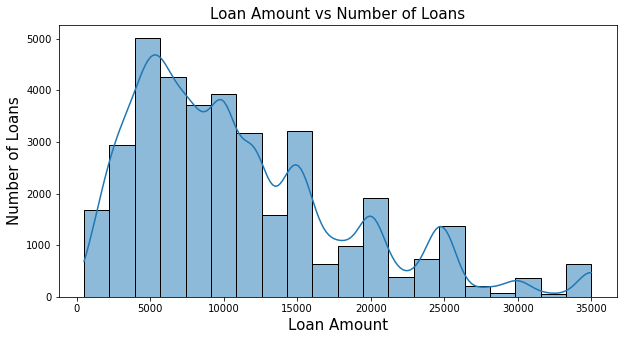

In [83]:
# Creating a Histplot for the loan_amnt variable
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='loan_amnt', bins = 20 , kde = True)
plt.title('Loan Amount vs Number of Loans', fontsize=15)
plt.xlabel('Loan Amount', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

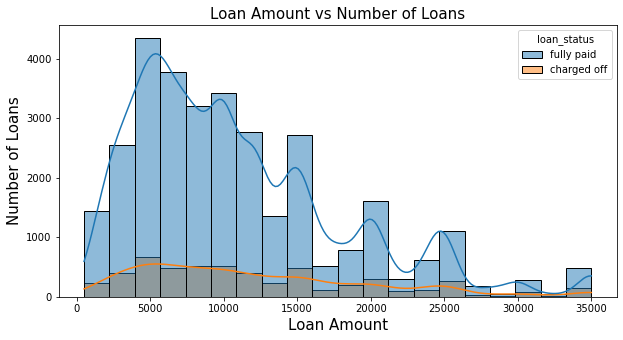

In [84]:
# Creating a Histplot for the loan_amnt variable with a breakup of our target variable
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='loan_amnt',hue ='loan_status' , bins = 20, kde = True)
plt.title('Loan Amount vs Number of Loans', fontsize=15)
plt.xlabel('Loan Amount', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>This shows more people are taking loans amount ranging from 5000 to 10000 and the default rate increases with the increase in loan amount.</b>

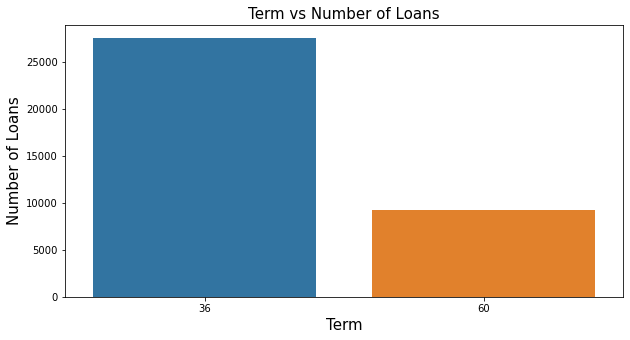

In [85]:
# Creating a Countplot for the term variable
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='term')
plt.title('Term vs Number of Loans', fontsize=15)
plt.xlabel('Term', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

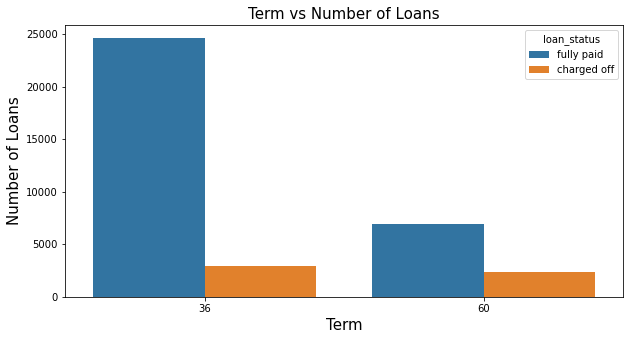

In [86]:
# Creating a Countplot for the term variable with a breakup of our target variable
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='term', hue='loan_status')
plt.title('Term vs Number of Loans', fontsize=15)
plt.xlabel('Term', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>This show the number of loan accepted for different term. Here we can see the fully paid and charged off (Defaulters) for each term. Thus we can see although the number of people who are defaulting are the same but the ratio of people who are defaulting instead of paying off their loan in a term of 60 months are much more.</b>

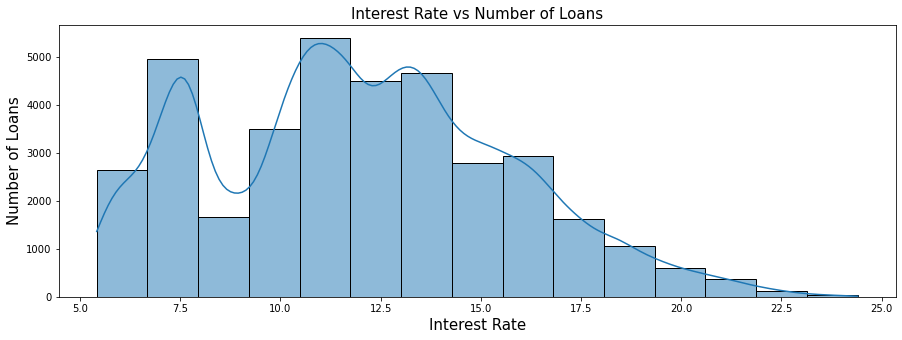

In [87]:
# Creating a Histplot for the int_rate variable
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='int_rate', kde=True , bins =15)
plt.title('Interest Rate vs Number of Loans', fontsize=15)
plt.xlabel('Interest Rate', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

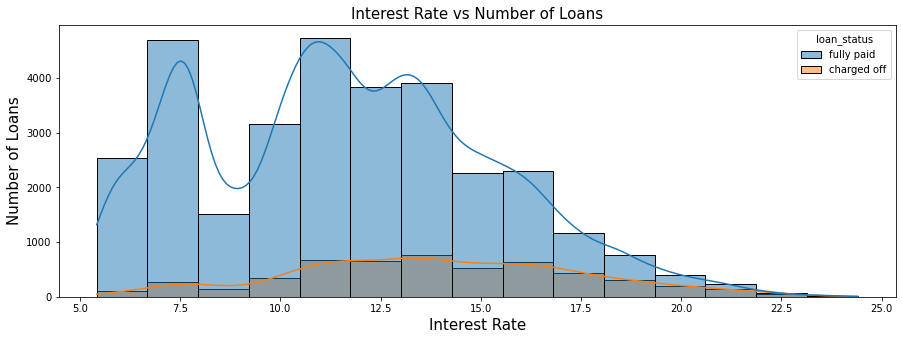

In [88]:
# Creating a Histplot for the int_rate variable with a breakup of our target variable
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='int_rate',hue = 'loan_status', kde=True , bins =15)
plt.title('Interest Rate vs Number of Loans', fontsize=15)
plt.xlabel('Interest Rate', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

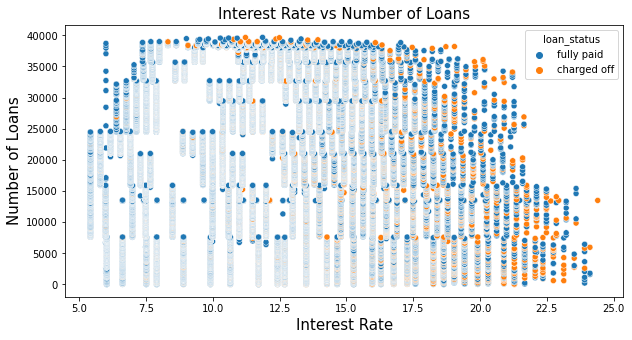

In [89]:
# Creating a ScatterPlot for the int_rate variable with a breakup of our target variable
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='int_rate', y= df.index ,hue='loan_status')
plt.title('Interest Rate vs Number of Loans', fontsize=15)
plt.xlabel('Interest Rate', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>Here we can see the default rate increases with the increase in interest rate.With this graph we can see that most of defaulters actually increases with the increase in interest rate.</b>

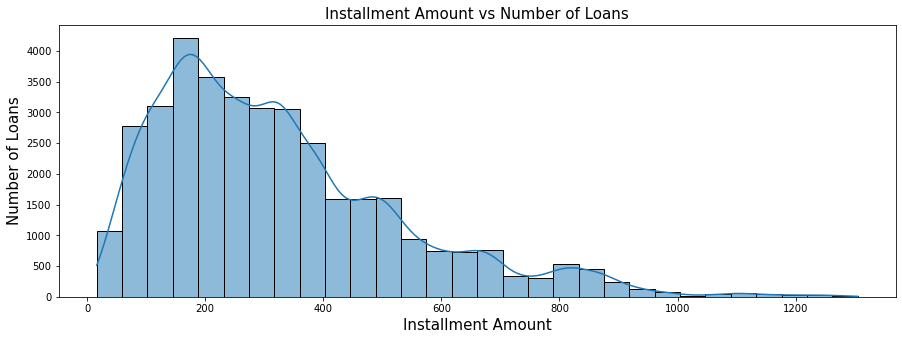

In [90]:
# Creating a Histplot for the installment variable
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='installment', kde=True, bins = 30)
plt.title('Installment Amount vs Number of Loans', fontsize=15)
plt.xlabel('Installment Amount', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

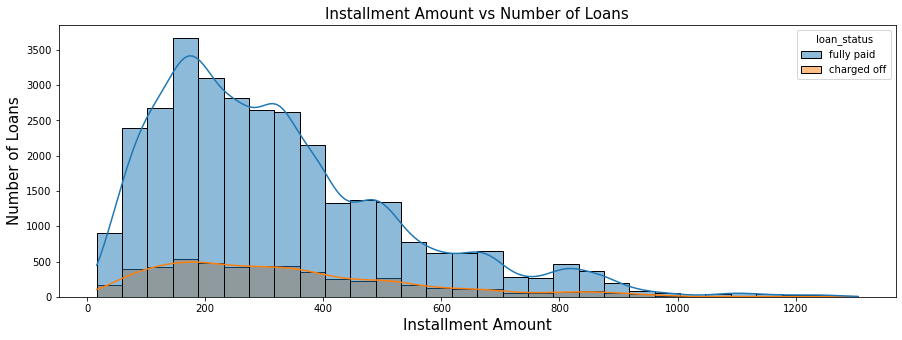

In [91]:
# Creating a Histplot for the installment variable with a breakup of our target variable
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='installment',hue='loan_status', kde=True, bins = 30)
plt.title('Installment Amount vs Number of Loans', fontsize=15)
plt.xlabel('Installment Amount', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>With this graph we can see the increase in default rate with increase in Installment amount.</b>

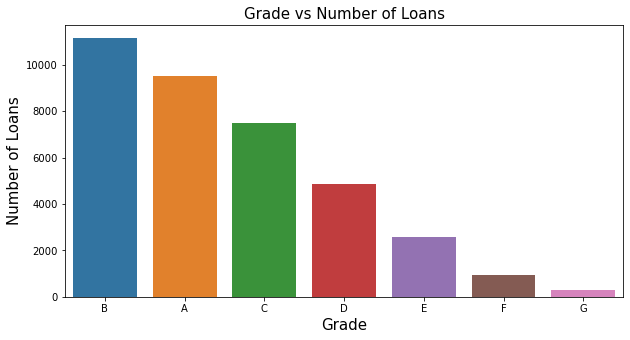

In [92]:
# Creating a Countplot for the grade variable ordered from highest number of Assigned loans to the least
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='grade',order = df['grade'].value_counts().index)
plt.title('Grade vs Number of Loans', fontsize=15)
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

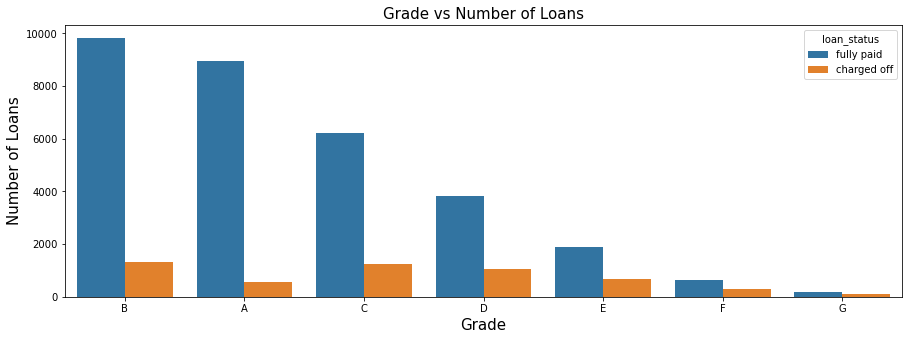

In [93]:
# Creating a Countplot for the grade variable with a breakup of our target variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='grade',hue = 'loan_status', order = df['grade'].value_counts().index)
plt.title('Grade vs Number of Loans', fontsize=15)
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>Here we can see the Number of loans taken by people according to the grading bucket. Also we can see that most people who have lower grading tends to default on their loan.</b>

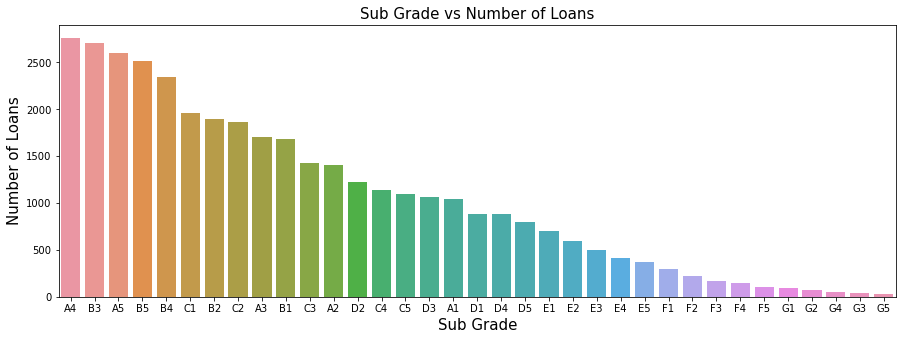

In [94]:
# Creating a Countplot for the sub_grade variable from highest number of Assigned loans to the least
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='sub_grade',order = df['sub_grade'].value_counts().index)
plt.title('Sub Grade vs Number of Loans', fontsize=15)
plt.xlabel('Sub Grade', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

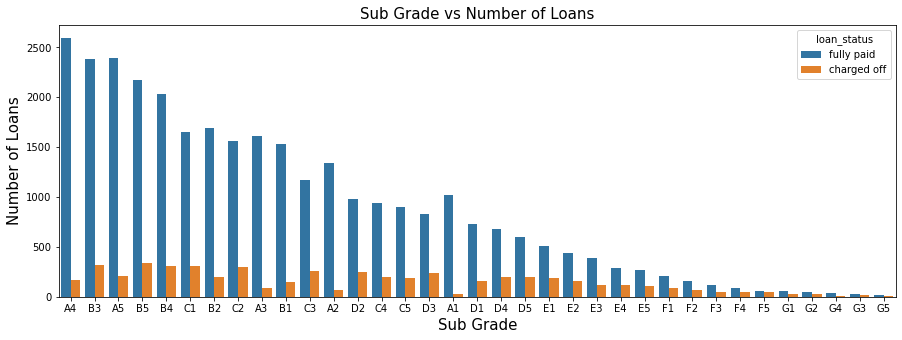

In [95]:
# Creating a Countplot for the sub_grade variable with a breakup of our target variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='sub_grade',hue='loan_status',order = df['sub_grade'].value_counts().index)
plt.title('Sub Grade vs Number of Loans', fontsize=15)
plt.xlabel('Sub Grade', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

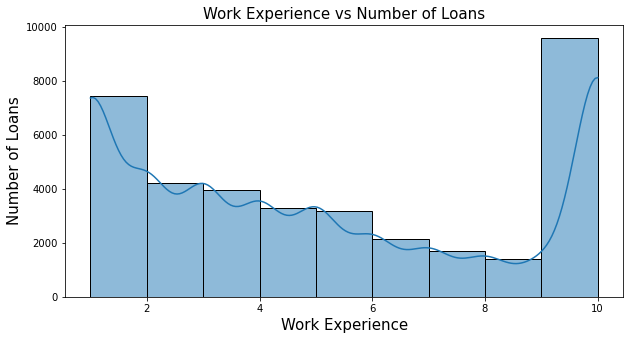

In [96]:
# Creating a Histplot for the emp_length variable
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='emp_length',kde=True , bins = 9)
plt.title('Work Experience vs Number of Loans', fontsize=15)
plt.xlabel('Work Experience', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

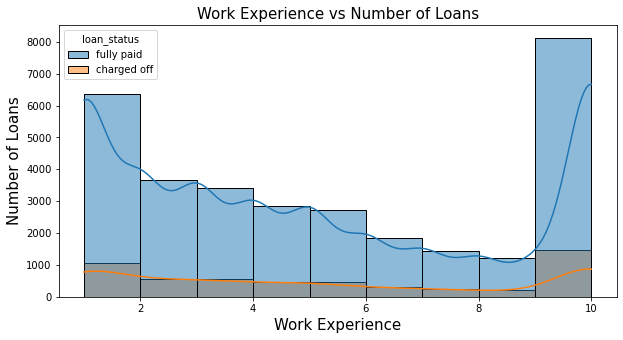

In [97]:
# Creating a Histplot for the emp_length variable with a breakup of our target variable
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='emp_length',hue ='loan_status',  kde=True , bins = 9)
plt.title('Work Experience vs Number of Loans', fontsize=15)
plt.xlabel('Work Experience', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

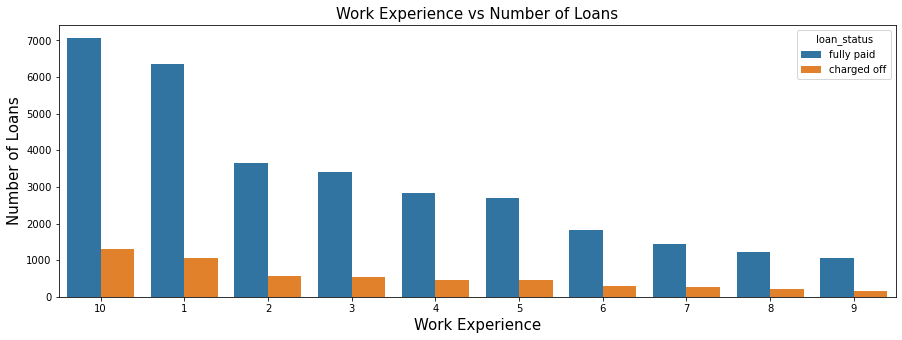

In [98]:
# Creating a Countplot for the emp_length variable with a breakup of our target variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='emp_length',hue='loan_status',order = df['emp_length'].value_counts().index)
plt.title('Work Experience vs Number of Loans', fontsize=15)
plt.xlabel('Work Experience', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>From the above graphs we can see the most loan are taken by the people either who have 1 year of work experience and the people who have more than or equal to 10 years of work experience. Also the amount of default rate is also higher in these buckets.</b>

In [99]:
#checking counts of number of people according to the work experience
df['emp_length'].value_counts(normalize = True)

10    0.227128
1     0.201319
2     0.114175
3     0.107227
4     0.089478
5     0.085787
6     0.057969
7     0.045838
8     0.038266
9     0.032811
Name: emp_length, dtype: float64

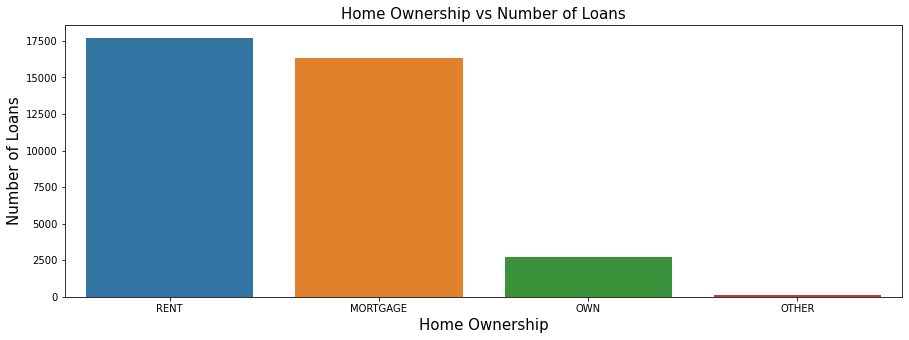

In [100]:
# Creating a Countplot for the home_ownership variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='home_ownership',order = df['home_ownership'].value_counts().index)
plt.title('Home Ownership vs Number of Loans', fontsize=15)
plt.xlabel('Home Ownership', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

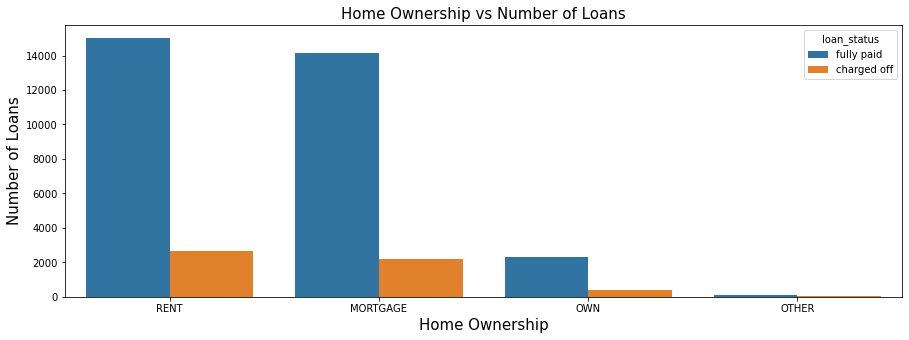

In [101]:
# Creating a Countplot for the home_ownership variable with a breakup of our target variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='home_ownership',hue='loan_status',order = df['home_ownership'].value_counts().index)
plt.title('Home Ownership vs Number of Loans', fontsize=15)
plt.xlabel('Home Ownership', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>Here we can see the default rate based on the home ownership and we can say that most loans are taken up by people who do not have their own houses and thus have higher defaults rate.</b>

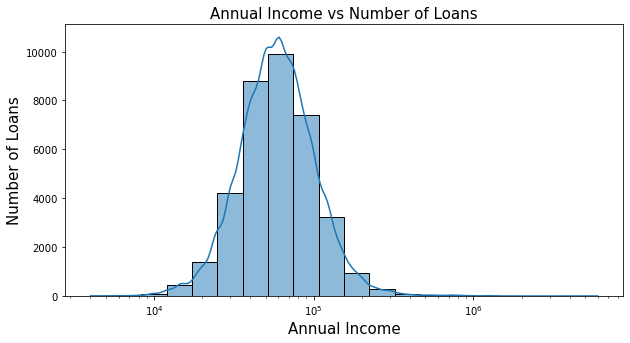

In [102]:
# Creating a Histplot for the annual_inc variable
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='annual_inc', kde=True , log_scale=True, bins = 20)
plt.title('Annual Income vs Number of Loans', fontsize=15)
plt.xlabel('Annual Income', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

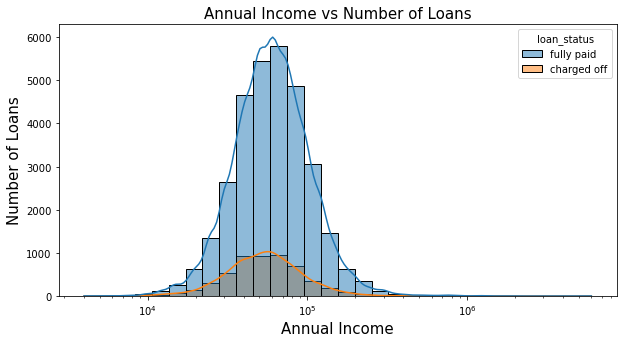

In [103]:
# Creating a Histplot for the annual_inc variable with a breakup of our target variable
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='annual_inc',hue = 'loan_status', kde=True ,log_scale = True, bins = 30)
plt.title('Annual Income vs Number of Loans', fontsize=15)
plt.xlabel('Annual Income', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<AxesSubplot:xlabel='annual_inc'>

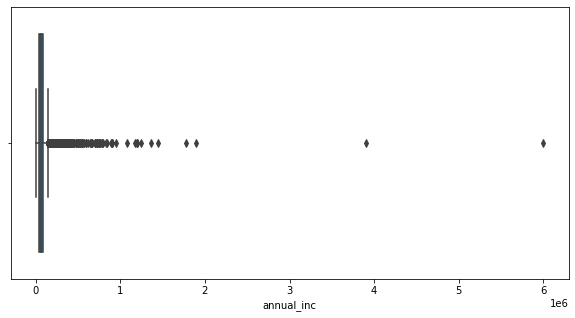

In [104]:
#Creating a box plot for annaul income
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='annual_inc')

<b>From this boxplot we can observe that there is a large variation in the annual income and majority of people are which are having income in lower range tends to take up loans more often.</b>

In [105]:
pd.options.display.float_format = '{:.2f}'.format
df['annual_inc'].describe()

count     36847.00
mean      69404.48
std       64027.47
min        4000.00
25%       41004.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

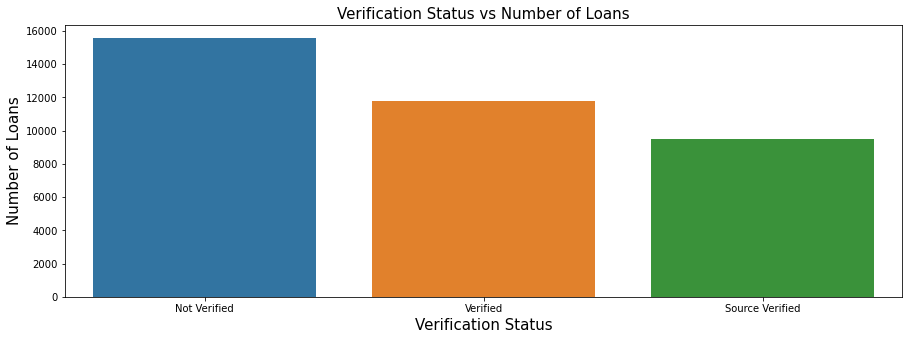

In [106]:
# Creating a Countplot for the verification_status variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='verification_status',order = df['verification_status'].value_counts().index)
plt.title('Verification Status vs Number of Loans', fontsize=15)
plt.xlabel('Verification Status', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

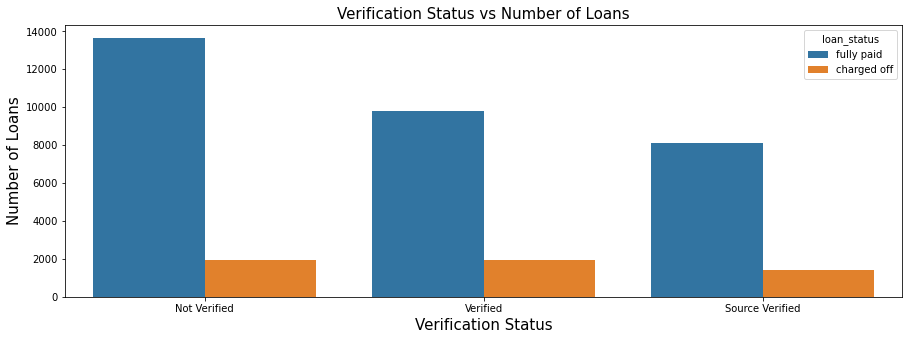

In [107]:
# Creating a Histplot for the verification_status variable with a breakup of our target variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='verification_status', hue='loan_status',order = df['verification_status'].value_counts().index)
plt.title('Verification Status vs Number of Loans', fontsize=15)
plt.xlabel('Verification Status', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>Here we can see that there is not much difference between the people who are verified and people who are not verified the default rate among them is almost the same all across the board.</b>

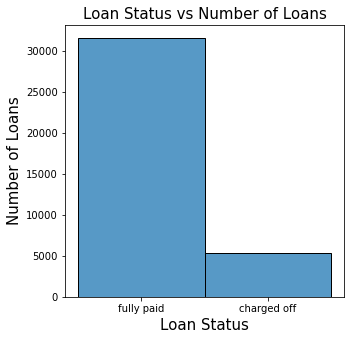

In [108]:
# Creating a Histplot for the loan_status variable
plt.figure(figsize=(5,5))
sns.histplot(data=df, x='loan_status')
plt.title('Loan Status vs Number of Loans', fontsize=15)
plt.xlabel('Loan Status', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>Here we can see how many people have paid off and how many people have defaulted.</b>

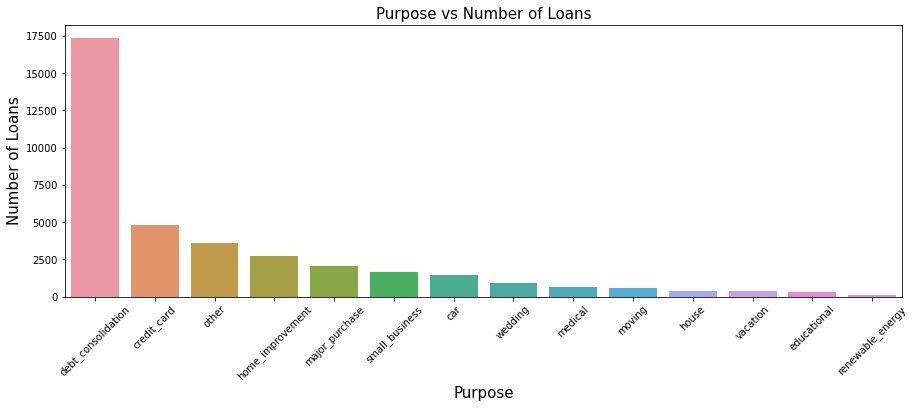

In [109]:
# Creating a Countplot for the purpose variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='purpose',order = df['purpose'].value_counts().index)
plt.title('Purpose vs Number of Loans', fontsize=15)
plt.xlabel('Purpose', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.xticks(rotation=45)
plt.show()

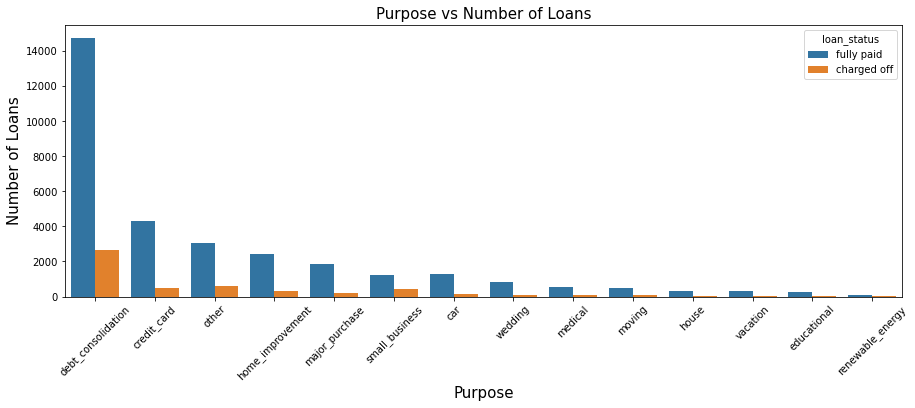

In [110]:
# Creating a Countplot for the purpose variable with a breakup of target variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='purpose',hue='loan_status',order = df['purpose'].value_counts().index)
plt.title('Purpose vs Number of Loans', fontsize=15)
plt.xlabel('Purpose', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.xticks(rotation=45)
plt.show()

<b>Here we can see the highest number of loans taken for different purpose as well as the amount of people who defaulted on their loan.</b>

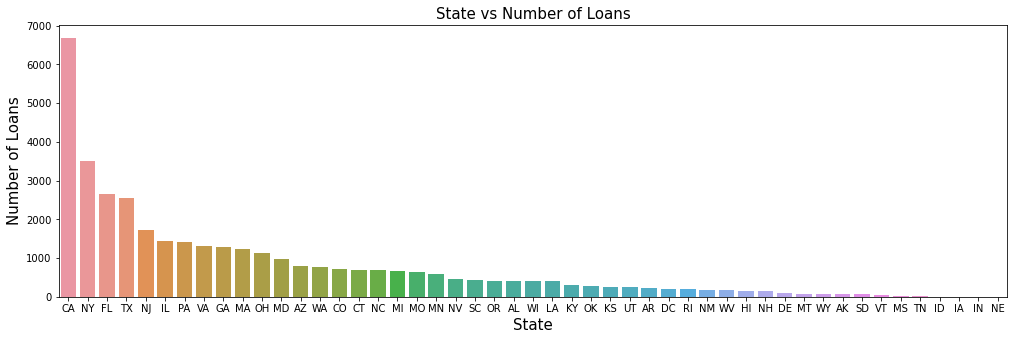

In [111]:
# Creating a Countplot for the addr_state variable
plt.figure(figsize=(17,5))
sns.countplot(data=df, x='addr_state',order = df['addr_state'].value_counts().index)
plt.title('State vs Number of Loans', fontsize=15)
plt.xlabel('State', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

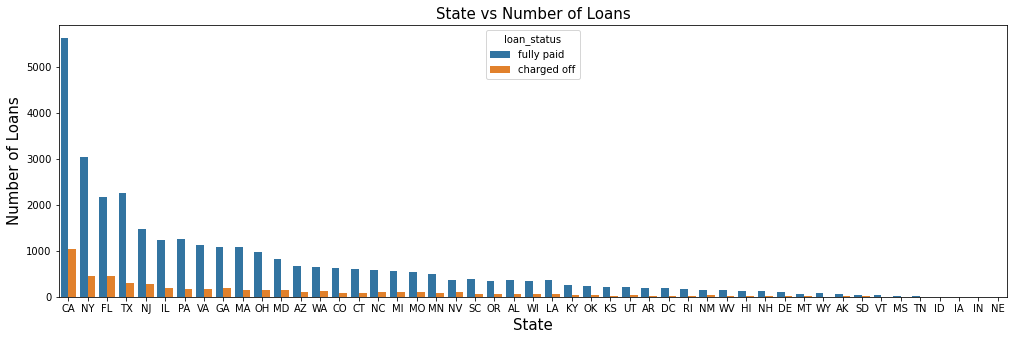

In [112]:
# Creating a Countplot for the addr_state variable with a breakup of target variable
plt.figure(figsize=(17,5))
sns.countplot(data=df, x='addr_state',hue='loan_status',order = df['addr_state'].value_counts().index)
plt.title('State vs Number of Loans', fontsize=15)
plt.xlabel('State', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>Here we can get the breakdown of the number of loans taken and number of defaults in different states.</b>

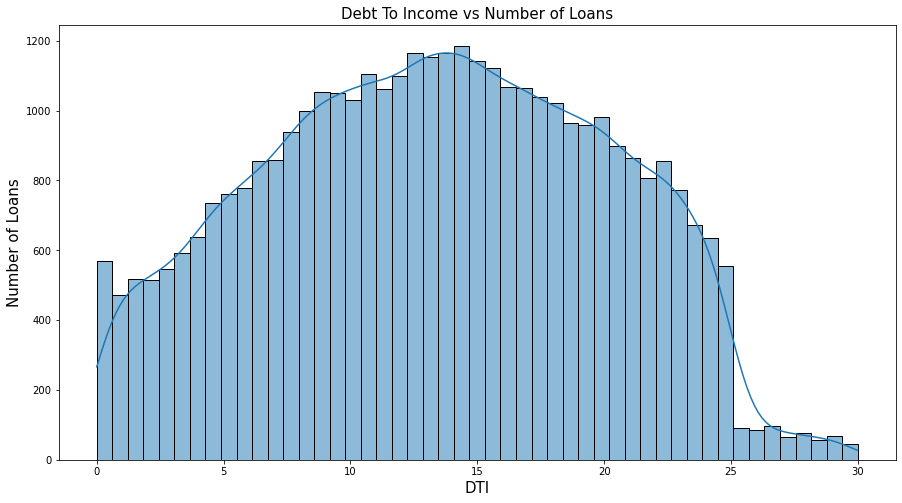

In [113]:
# Creating a Histplot for the dti variable
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='dti', kde=True)
plt.title('Debt To Income vs Number of Loans', fontsize=15)
plt.xlabel('DTI', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

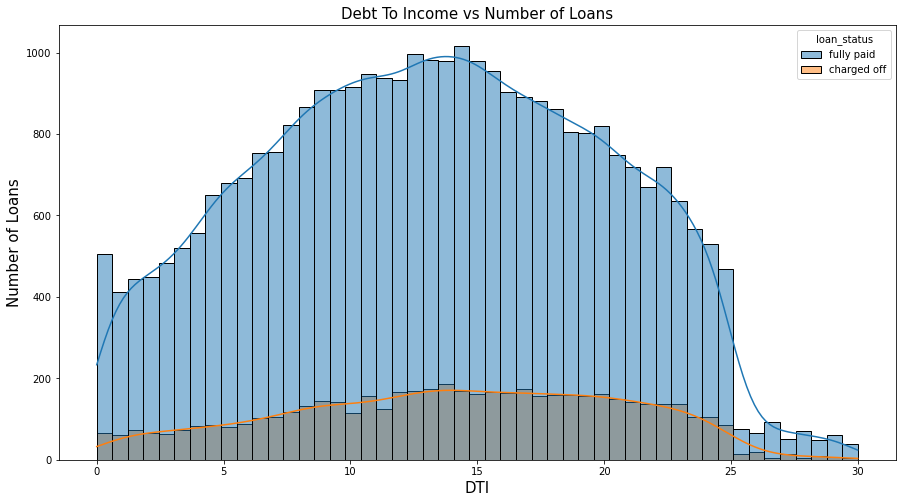

In [114]:
# Creating a Histplot for the dti variable with a breakup of target variable
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='dti',hue='loan_status', kde=True)
plt.title('Debt To Income vs Number of Loans', fontsize=15)
plt.xlabel('DTI', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>Here we can see the higher DTI is have higher number of loans and higher default rate.</b>

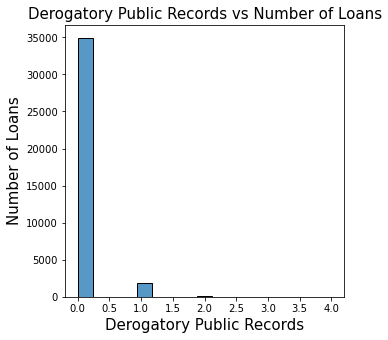

In [115]:
# Creating a Histplot for the pub_rec variable
plt.figure(figsize=(5,5))
sns.histplot(data=df, x='pub_rec')
plt.title('Derogatory Public Records vs Number of Loans', fontsize=15)
plt.xlabel('Derogatory Public Records', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>Here we can see most of the records have no Derogarotry public records.</b>

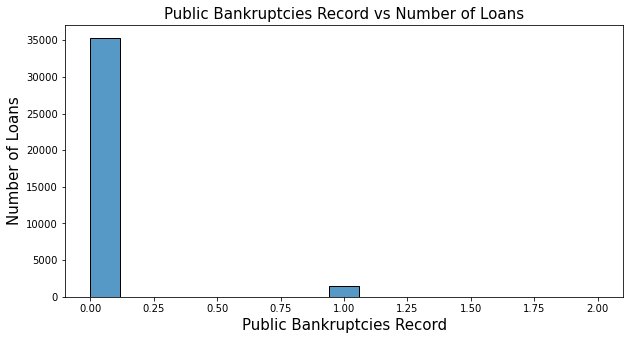

In [116]:
# Creating a Histplot for the pub_rec_bankruptcies variable
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='pub_rec_bankruptcies')
plt.title('Public Bankruptcies Record vs Number of Loans', fontsize=15)
plt.xlabel('Public Bankruptcies Record', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>Here we can see that majority of the people have no public bankruptcies record.</b>

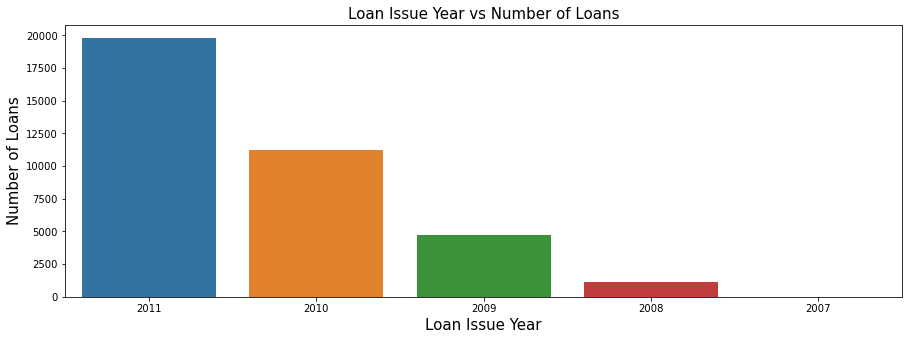

In [117]:
# Creating a Countplot for the issue_year variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='issue_year',order = df['issue_year'].value_counts().index)
plt.title('Loan Issue Year vs Number of Loans', fontsize=15)
plt.xlabel('Loan Issue Year', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

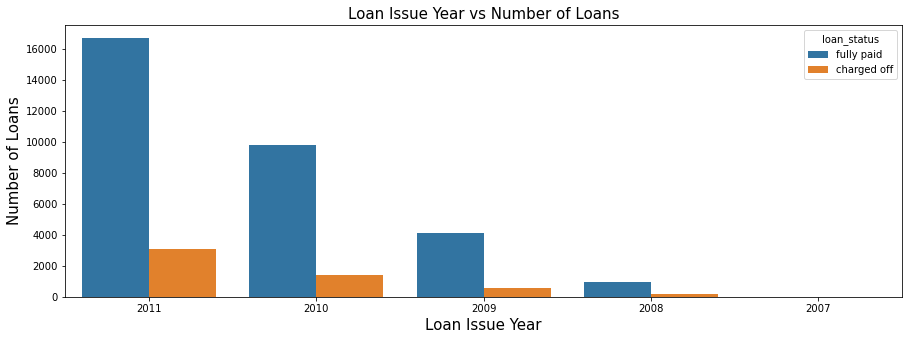

In [118]:
# Creating a Countplot for the issue_year variable with a breakup of target variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='issue_year',hue='loan_status', order = df['issue_year'].value_counts().index)
plt.title('Loan Issue Year vs Number of Loans', fontsize=15)
plt.xlabel('Loan Issue Year', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>Here we can see the number of loan issued and the default rate for each years and we can clearly see the rise in the number of loans and default rate for subsequent years.</b>

In [119]:
#Group by issue year 
df.groupby(by=(['issue_year'])).sum()

loan_amnt    term  int_rate  installment  emp_length  \
issue_year                                                         
2007            63625     252     76.36      2077.56          24   
2008          9628300   40032  12556.54    288292.42        4825   
2009         46414325  169668  57452.84   1551517.97       19963   
2010        119669950  475752 132038.58   3431114.70       56328   
2011        234748300  862956 239610.27   6691019.24      106028   

              annual_inc       dti  delinq_2yrs  pub_rec  revol_bal  \
issue_year                                                            
2007           394324.39     57.93            0        7      75308   
2008         71238882.58  13773.77          210      110   16002217   
2009        320912266.58  58318.75          621      215   64968296   
2010        780480815.18 145528.89         1581      627  145993611   
2011       1384320654.45 273507.73         2974     1037  265164603   

            revol_util  total_acc  total_pymnt  last_pymnt_amnt  \
issue_year                                                        
2007            430.90        148     59274.62         22342.74   
2008          50269.39      23149   9163377.23       1463582.55   
2009         213669.08      99926  50316755.78       9267519.92   
2010         543601.55     246257 128154671.22      26059808.97   
2011         997261.71     446225 254140665.94      66072379.88   

            pub_rec_bankruptcies  issue_month  default_rate  
issue_year                                                   
2007                           7           72             2  
2008                          87         8833           173  
2009                         142        35623           593  
2010                         448        80805          1411  
2011                         856       138358          3102

In [120]:
df['issue_year'].value_counts()

2011    19801
2010    11214
2009     4713
2008     1112
2007        7
Name: issue_year, dtype: int64

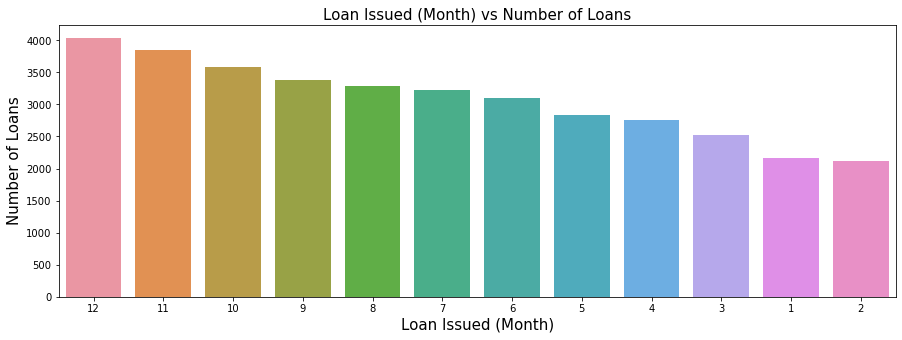

In [121]:
# Creating a Countplot for the issue_month variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='issue_month', order = df['issue_month'].value_counts().index)
plt.title('Loan Issued (Month) vs Number of Loans', fontsize=15)
plt.xlabel('Loan Issued (Month)', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

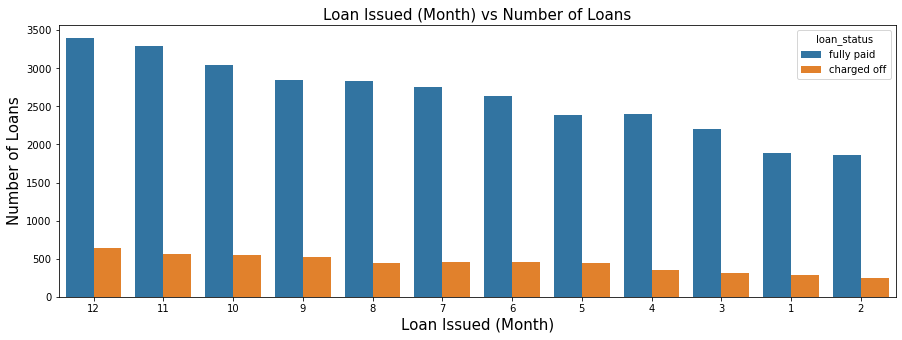

In [122]:
# Creating a Countplot for the issue_month variable with a breakup of target variable
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='issue_month',hue='loan_status', order = df['issue_month'].value_counts().index)
plt.title('Loan Issued (Month) vs Number of Loans', fontsize=15)
plt.xlabel('Loan Issued (Month)', fontsize=15)
plt.ylabel('Number of Loans', fontsize=15)
plt.show()

<b>Here we can see the number of loan issued and the default rate for each years and we can see there is a trend where the number of loans are increased as the year progresses.</b>

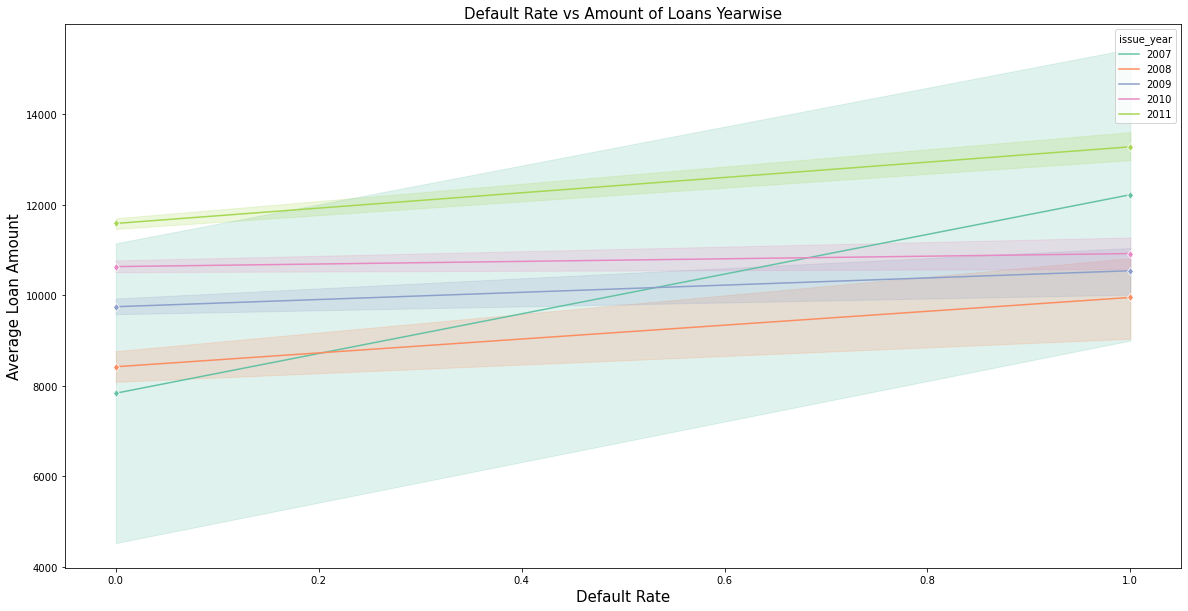

In [123]:
# Line Plot default_rate vs loan_amount to year wise .Default rate is increasing for 2011 2008 2007  
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x="default_rate", y="loan_amnt",hue='issue_year', marker = 'd',palette="Set2")
plt.title('Default Rate vs Amount of Loans Yearwise', fontsize=15)
plt.xlabel('Default Rate', fontsize=15)
plt.ylabel('Average Loan Amount', fontsize=15)
plt.show()

<b>Here we can see the average loan amount for defaulters is higher for than the non defaulters. The situation is most dire in the year 2007 which could be due to the global financial crisis of 2007. The later year of 2008, 2009 , 2010 show simmilar pattern but not to that degree but we again see a rise in 2011 which could be an indicator of 2011 debt ceiling crisis</b>

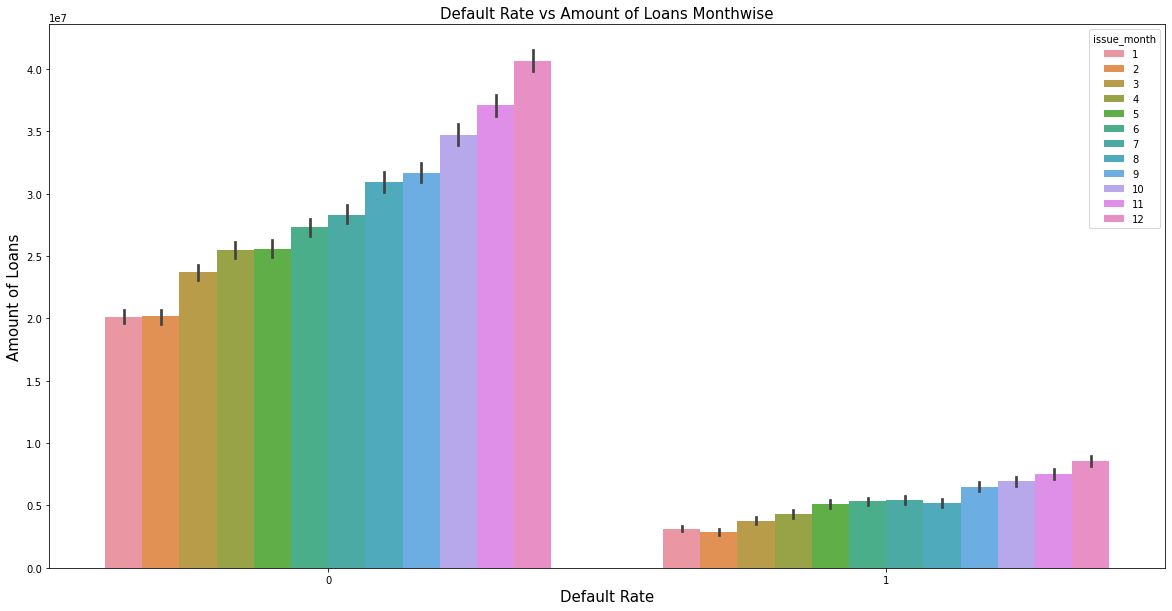

In [124]:
#Line Plot default_rate to loan_amount to month wise. Default rate is increasing for 2011 2008 2007
plt.figure(figsize=(20,10))
sns.barplot(data=df, x="default_rate", y="loan_amnt",hue='issue_month',estimator=sum)
plt.title('Default Rate vs Amount of Loans Monthwise', fontsize=15)
plt.xlabel('Default Rate', fontsize=15)
plt.ylabel('Amount of Loans', fontsize=15)
plt.show()

# Default Rate  to Grade Analysis


In [125]:
df.groupby(by=(['grade'])).sum()

loan_amnt    term  int_rate  installment  emp_length   annual_inc  \
grade                                                                      
A       83009475  351768  69861.06   2473199.84       49440 642528182.03   
B      122866050  455952 123086.22   3587240.64       56354 759916180.81   
C       81677600  318408 101693.50   2394445.37       36767 510317210.14   
D       59377575  218664  76508.39   1773537.14       24430 336023971.91   
E       40508375  135372  45676.43   1100404.27       13495 201555307.23   
F       17093400   52032  18594.42    464674.87        5055  79048369.55   
G        5992025   16464   6314.57    170519.76        1627  27957721.51   

            dti  delinq_2yrs  pub_rec  revol_bal  revol_util  total_acc  \
grade                                                                     
A     115372.70          422      136  108771282   286709.09     223806   
B     149962.59         1305      605  149482235   523283.95     244634   
C     104104.98         1416      573  101299270   425352.47     158322   
D      67933.98         1204      368   68402478   306401.28     101998   
E      36234.64          605      204   41946206   175141.22      57493   
F      13430.75          309       86   16253693    66109.91      22378   
G       4147.43          125       24    6048871    22234.72       7074   

       total_pymnt  last_pymnt_amnt  pub_rec_bankruptcies  issue_year  \
grade                                                                   
A      86662607.86      18886669.80                   114    19135008   
B     131817604.78      31016910.98                   489    22415415   
C      88758067.45      20135686.23                   431    15048562   
D      65093914.13      14786278.61                   265     9786210   
E      44268505.13      11484447.29                   160     5197022   
F      18528681.92       4706678.67                    63     1897980   
G       6705363.52       1868962.48                    18      595116   

       issue_month  default_rate  
grade                             
A            69448           552  
B            80292          1326  
C            53258          1254  
D            33816          1052  
E            18160           690  
F             6613           307  
G             2104           100

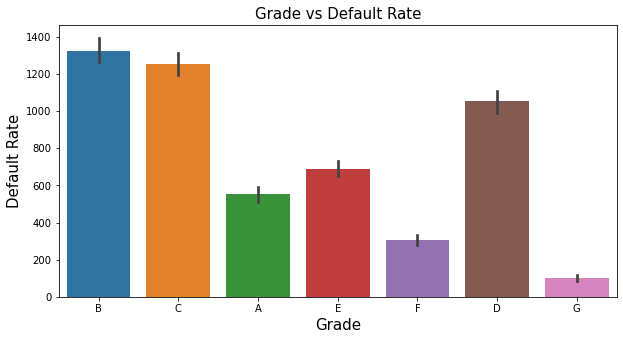

In [126]:
#Bar Plot for Grade vs Default Rate (loan status)
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='grade' , y='default_rate', estimator= sum)
plt.title('Grade vs Default Rate', fontsize=15)
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.show()

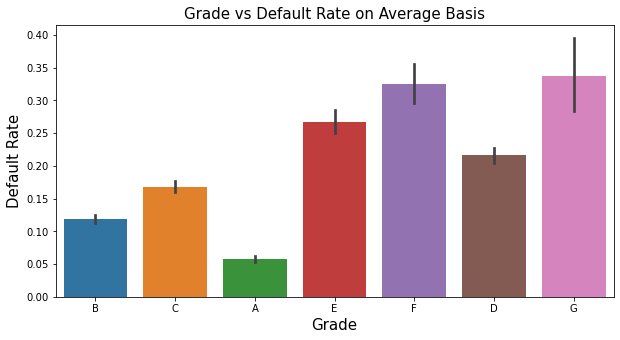

In [127]:
# Bar Plot for grade vs default rate 
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='grade' , y='default_rate', estimator= mean)
plt.title('Grade vs Default Rate on Average Basis', fontsize=15)
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.show()

<b>Here we can see although most default happens in B grade but due to the amount of people who are given the B grade are the most thus they have most amount of default rate but when we see the average amount of default rate for each grade we can see the lower grade have higher chance to default.</b>

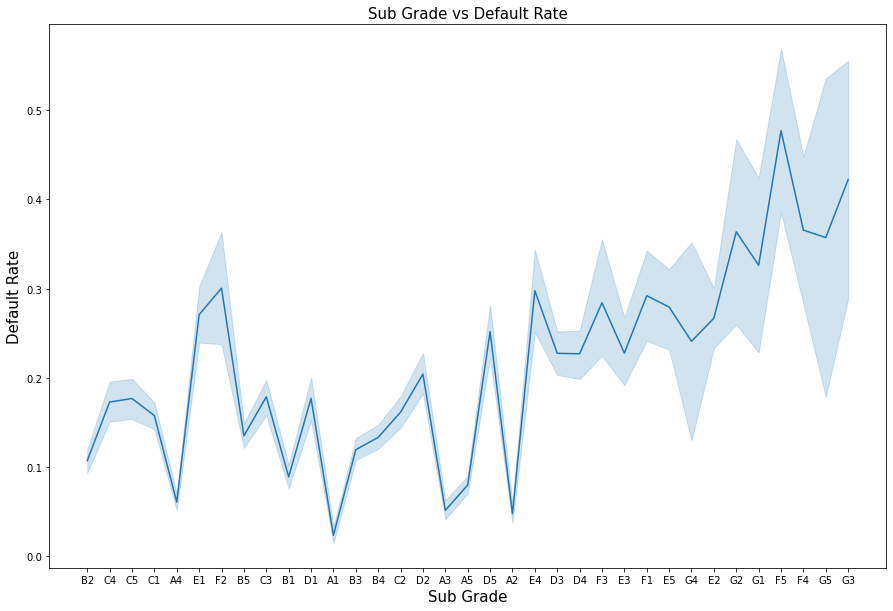

In [128]:
# Creating linplot of Subgrade vs default rate (target variable)
plt.figure(figsize=(15,10))
sns.lineplot(x='sub_grade',y='default_rate',data=df)
plt.title('Sub Grade vs Default Rate', fontsize=15)
plt.xlabel('Sub Grade', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.show()

<b>Here we can see the Sub Grade in category D1-D5,E1-E5,F1-F5,G1-G5 have i.e higher default which is higher default with lower grade rating.</b>

In [129]:
# Creating linplot of Subgrade vs default rate (target variable) with issue year 
plt.figure(figsize=(15,10))
sns.lineplot(x='sub_grade',y='default_rate',data=df, hue='issue_year')
plt.title('Sub Grade vs Default Rate Yearwise', fontsize=15)
plt.xlabel('Sub Grade', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.show()

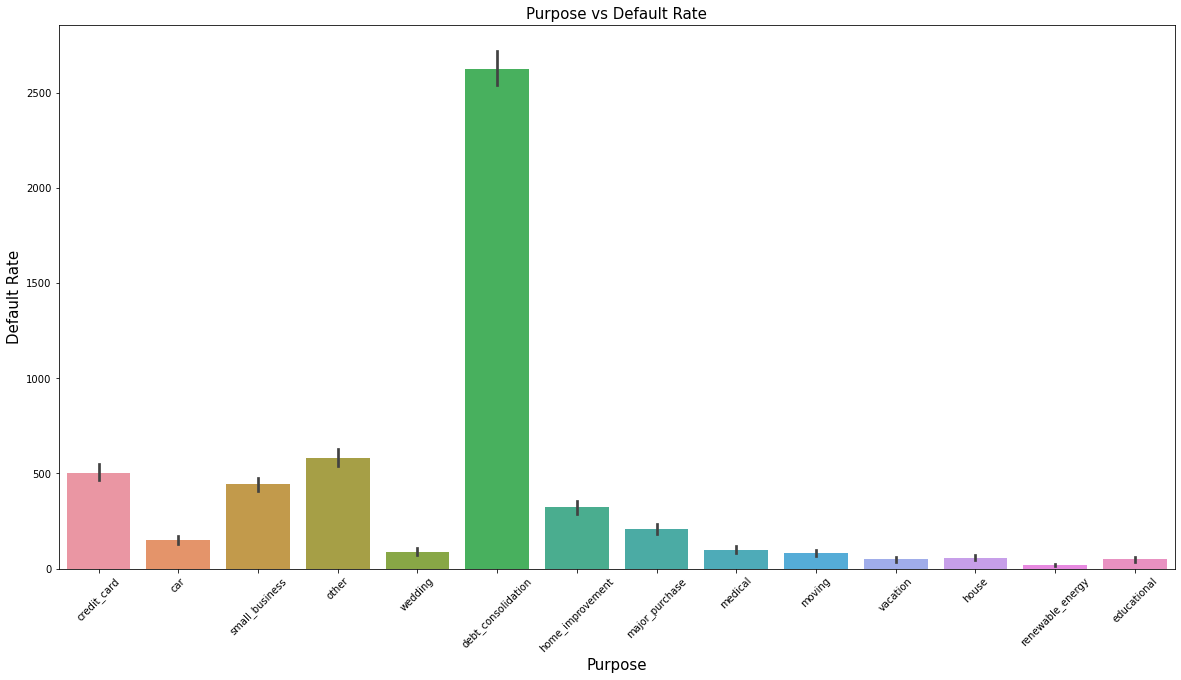

In [130]:
#Purpose to Default Rate Debt_consolidation is more prone to default,we can also see this observation by using group by on purpose 
plt.figure(figsize=(20,10))
sns.barplot(x='purpose',y='default_rate',data=df,estimator=sum)
plt.title('Purpose vs Default Rate', fontsize=15)
plt.xlabel('Purpose', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.xticks(rotation=45)
plt.show()

<b>Here we can see the highest default rate count wise is for the purpose of debt consolidation.</b>

In [131]:
#Group by on the basis of sum
df.groupby(by=(['purpose'])).sum()

loan_amnt    term  int_rate  installment  emp_length  \
purpose                                                                    
car                   9742825   63372  15066.37    275005.98        7186   
credit_card          56015650  194820  56047.61   1671941.58       24208   
debt_consolidation  218935750  741744 216172.38   6366090.66       89525   
educational           2026425   11100   3530.66     65024.14        1131   
home_improvement     31217575  117084  30971.90    879418.11       16168   
house                 4484700   15108   4313.58    128864.78        1721   
major_purchase       16670025   84108  22334.02    485359.45        9960   
medical               5235100   26844   7465.68    151348.23        3369   
moving                3604025   21756   6291.90    106389.81        2107   
other                28996025  146592  42640.81    858869.74       17722   
renewable_energy       821150    3984   1081.77     23998.24         563   
small_business       22101625   71724  21526.93    633122.47        7903   
vacation              1890925   13536   3721.51     56571.78        1918   
wedding               8782700   36888  10569.47    262016.92        3687   

                      annual_inc       dti  delinq_2yrs  pub_rec  revol_bal  \
purpose                                                                       
car                  89850106.54  15928.22          218       82   15354834   
credit_card         340070292.20  70216.07          497      264   83559512   
debt_consolidation 1175712362.03 251478.86         2327      969  253960588   
educational          16396847.58   3427.41           46       13    2954792   
home_improvement    247676933.04  30548.09          482      172   33287133   
house                27192053.16   3698.07           61       19    3307164   
major_purchase      138658663.79  22234.38          343       84   18189351   
medical              44106085.63   7949.83          137       54    6471228   
moving               34258997.15   6359.34           92       21    4118191   
other               229510869.78  44468.31          651      158   37923490   
renewable_energy      7557718.63   1115.41           13        4    1138358   
small_business      124541044.71  18546.37          292       98   21275679   
vacation             20799273.89   4194.26           60       28    2686080   
wedding              61015695.05  11022.45          167       30    7977635   

                    revol_util  total_acc  total_pymnt  last_pymnt_amnt  \
purpose                                                                   
car                   52581.60      29549  10729788.74       2523296.02   
credit_card          272229.39     110461  61660683.05      13342741.05   
debt_consolidation   939838.29     398056 236956587.46      56355368.65   
educational           11821.29       5655   2088322.12        379632.61   
home_improvement     100087.84      66327  33717161.07       8570821.06   
house                 12471.90       7354   4768307.95       1277274.76   
major_purchase        73763.77      40836  17945947.22       4289615.14   
medical               27409.95      14087   5500671.98       1291357.31   
moving                24159.72      10334   3829895.68        816572.78   
other                165988.92      71660  30641206.27       6830079.54   
renewable_energy       4508.40       2165    865324.37        222585.18   
small_business        67859.38      35053  21446401.48       4344658.53   
vacation              14607.40       7198   2024181.08        415549.90   
wedding               37904.78      16970   9660266.33       2226081.53   

                    pub_rec_bankruptcies  issue_year  issue_month  \
purpose                                                             
car                                   60     2876942         9533   
credit_card                          223     9651625        35547   
debt_consolidation                   790    34948813       12

In [132]:
#Creating bar plot of Purpose vs Default Rate
plt.figure(figsize=(20,10))
sns.barplot(x='purpose',y='default_rate',data=df,estimator=mean)
plt.title('Purpose vs Default Rate on Average Basis', fontsize=15)
plt.xlabel('Purpose', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.xticks(rotation=45)
plt.show()

<b>Here we can see the highest default rate mean wise is for the purpose of small buisness.</b>

<b>So from above two graph we can see that eventhough the overall default rate is highest for debt consolidation purpose but by doing the average we can see the people who take loans for the purpose of small buisness tends to default most of the time.</b>

In [133]:
df.groupby(by=(['purpose'])).mean()

loan_amnt  term  int_rate  installment  emp_length  \
purpose                                                                  
car                   6808.40 44.29     10.53       192.18        5.02   
credit_card          11667.50 40.58     11.67       348.25        5.04   
debt_consolidation   12594.10 42.67     12.44       366.20        5.15   
educational           6777.34 37.12     11.81       217.47        3.78   
home_improvement     11405.76 42.78     11.32       321.31        5.91   
house                12850.14 43.29     12.36       369.24        4.93   
major_purchase        8088.32 40.81     10.84       235.50        4.83   
medical               8091.34 41.49     11.54       233.92        5.21   
moving                6637.25 40.07     11.59       195.93        3.88   
other                 8036.59 40.63     11.82       238.05        4.91   
renewable_energy      8735.64 42.38     11.51       255.30        5.99   
small_business       13338.34 43.29     12.99       382.09        4.77   
vacation              5529.02 39.58     10.88       165.41        5.61   
wedding               9824.05 41.26     11.82       293.08        4.12   

                    annual_inc   dti  delinq_2yrs  pub_rec  revol_bal  \
purpose                                                                 
car                   62788.33 11.13         0.15     0.06   10730.14   
credit_card           70833.22 14.63         0.10     0.05   17404.61   
debt_consolidation    67631.87 14.47         0.13     0.06   14608.87   
educational           54838.96 11.46         0.15     0.04    9882.25   
home_improvement      90492.12 11.16         0.18     0.06   12161.90   
house                 77914.19 10.60         0.17     0.05    9476.11   
major_purchase        67277.37 10.79         0.17     0.04    8825.50   
medical               68170.15 12.29         0.21     0.08   10001.90   
moving                63092.08 11.71         0.17     0.04    7584.15   
other                 63611.66 12.32         0.18     0.04   10510.95   
renewable_energy      80401.26 11.87         0.14     0.04   12110.19   
small_business        75160.56 11.19         0.18     0.06   12839.88   
vacation              60816.59 12.26         0.18     0.08    7854.04   
wedding               68250.22 12.33         0.19     0.03    8923.53   

                    revol_util  total_acc  total_pymnt  last_pymnt_amnt  \
purpose                                                                   
car                      36.74      20.65      7498.11          1763.31   
credit_card              56.70      23.01     12843.30          2779.16   
debt_consolidation       54.06      22.90     13630.73          3241.80   
educational              39.54      18.91      6984.35          1269.67   
home_improvement         36.57      24.23     12319.02          3131.47   
house                    35.74      21.07     13662.77          3659.81   
major_purchase           35.79      19.81      8707.40          2081.33   
medical                  42.36      21.77      8501.81          1995.92   
moving                   44.49      19.03      7053.21          1503.82   
other                    46.01      19.86      8492.57          1893.04   
renewable_energy         47.96      23.03      9205.58          2367.93   
small_business           40.95      21.15     12942.91          2622.00   
vacation                 42.71      21.05      5918.66          1215.06   
wedding                  42.40      18.98     10805.67          2490.02   

                    pub_rec_bankruptcies  issue_year  issue_month  \
purpose                                                             
car                                 0.04     2010.44         6.66   
credit_card                         0.05     2010.34         7.40   
debt_consolidation                  0.05     2010.40         7.24   
educational                         0.03     2009.16         6.39   
home_improvement                    0.04     2010.3

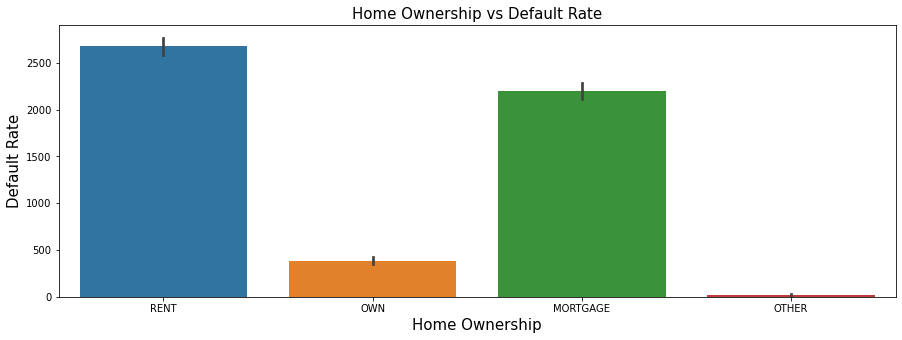

In [134]:
#Default rate to home ownership barplot
plt.figure(figsize=(15,5))
sns.barplot(x='home_ownership',y='default_rate',data=df,estimator=sum)
plt.title('Home Ownership vs Default Rate', fontsize=15)
plt.xlabel('Home Ownership', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.show()

In [135]:
#Home ownership to Default Rate barplot by mean
plt.figure(figsize=(15,5))
sns.barplot(x='home_ownership',y='default_rate',data=df,estimator=mean)
plt.title('Home Ownership vs Default Rate on Average Basis', fontsize=15)
plt.xlabel('Home Ownership', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.show()

In [136]:
df['home_ownership'].value_counts()

RENT        17698
MORTGAGE    16343
OWN          2708
OTHER          98
Name: home_ownership, dtype: int64

In [137]:
df.groupby(by=(['home_ownership'])).sum()

loan_amnt    term  int_rate  installment  emp_length  \
home_ownership                                                         
MORTGAGE        205190100  706164 191494.97   5823761.80       98377   
OTHER             1044975    3552   1180.01     33197.08         406   
OWN              28001650  112632  32063.88    823758.00       14610   
RENT            176287775  726312 216995.73   5283305.01       73775   

                  annual_inc       dti  delinq_2yrs  pub_rec  revol_bal  \
home_ownership                                                            
MORTGAGE       1365505589.09 214856.20         2532     1027  280488594   
OTHER             6988352.00   1102.69           31        4    1170190   
OWN             163861355.86  36047.64          422      126   31490004   
RENT           1020991646.23 239180.54         2401      839  179055247   

                revol_util  total_acc  total_pymnt  last_pymnt_amnt  \
home_ownership                                                        
MORTGAGE         764396.63     429782 221047964.78      54483480.44   
OTHER              4251.82       2125   1025258.45        173239.20   
OWN              120258.44      56967  29797386.75       7745597.04   
RENT             916325.75     326831 189964134.82      40483317.38   

                pub_rec_bankruptcies  issue_year  issue_month  default_rate  
home_ownership                                                               
MORTGAGE                         813    32855921       116935          2199  
OTHER                              3      196859          608            18  
OWN                               97     5443917        19769           387  
RENT                             627    35578616       126379          2677

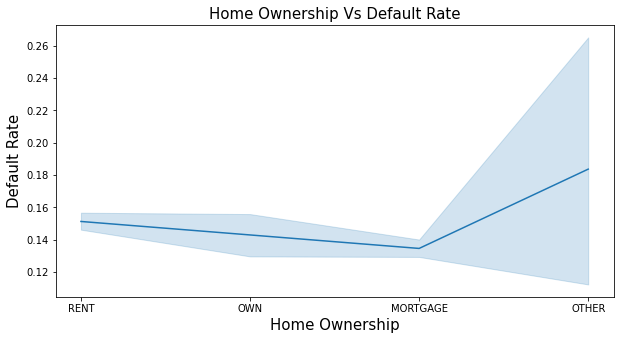

In [138]:
# Default rate to home ownership lineplot
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="home_ownership", y="default_rate",markers=True,dashes=True)
plt.title('Home Ownership Vs Default Rate', fontsize=15)
plt.xlabel('Home Ownership', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.show()

<b>From above graphs we can see that the overall trend is that most people who defaults on their loans do not own a house but when we see the average of people who default then we can see people who gave other in their forms defaulted the most followed by people who rent.</b>

In [139]:
# Creating a Barplot for the issue_year with loan_amnt variable wrt default_rate
plt.figure(figsize=(10,10))
sns.barplot('issue_year','loan_amnt', hue='default_rate', data=df, estimator=sum)
plt.title('Issuance of Loans Yearwise', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Loan Amount Issued', fontsize=15)
plt.show()

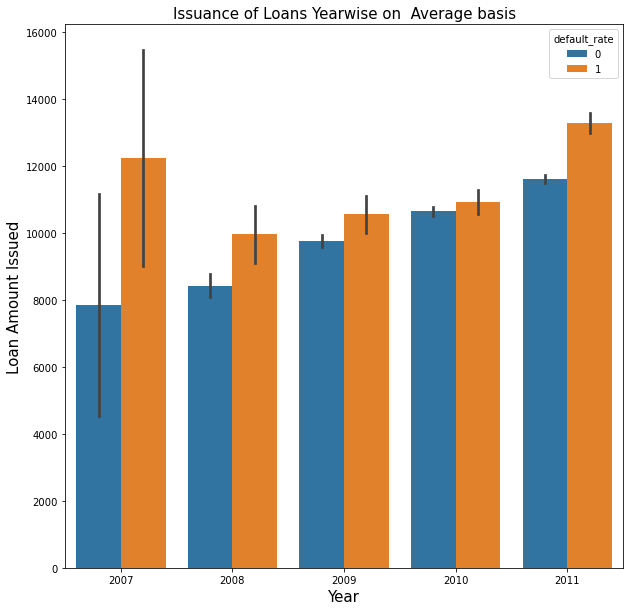

In [140]:
# Creating a Barplot for the issue_year with loan_amnt variable(mean) wrt default_rate
plt.figure(figsize=(10,10))
sns.barplot('issue_year','loan_amnt', hue='default_rate' ,data=df, estimator=mean)
plt.title('Issuance of Loans Yearwise on  Average basis', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Loan Amount Issued', fontsize=15)
plt.show()

<b>From above two graphs we can see that the overall trend of loan defaulting has increased year on year basis but when we see the average then we can see 2007 and 2011 were the years where we saw the most loan defaults.</b>

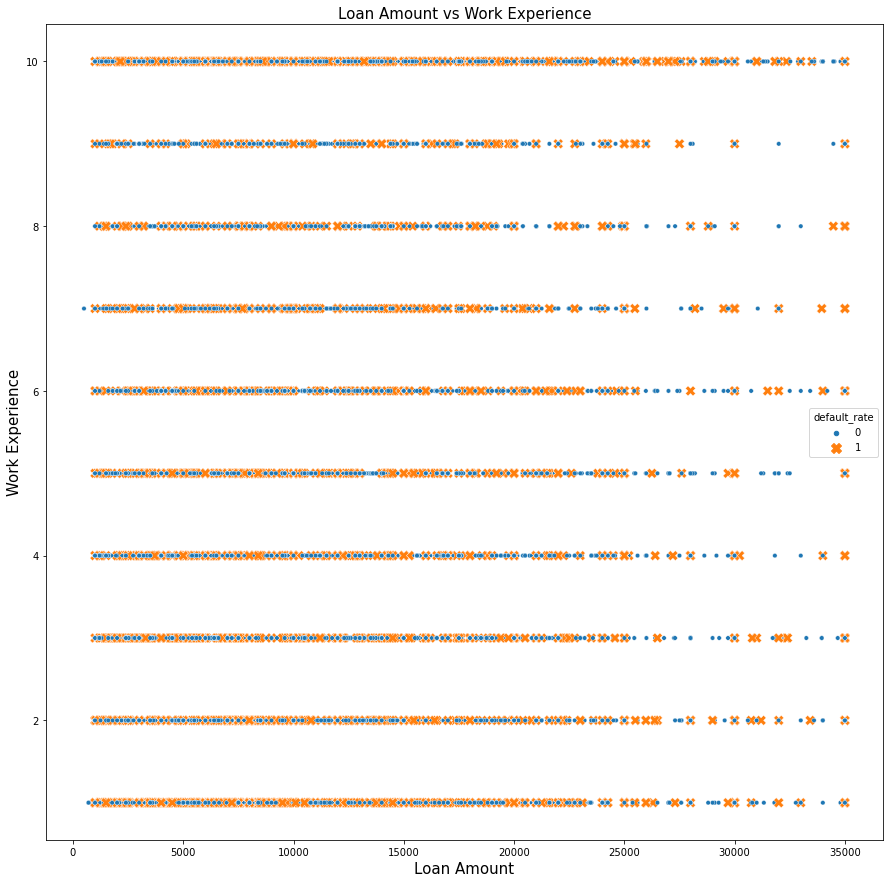

In [141]:
# Loan Amount to home ownership scatterplot
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x= 'loan_amnt', y='emp_length', hue='default_rate',style="default_rate", size='default_rate',sizes=(100, 20))
plt.title('Loan Amount vs Work Experience', fontsize=15)
plt.xlabel('Loan Amount', fontsize=15)
plt.ylabel('Work Experience', fontsize=15)
plt.show()

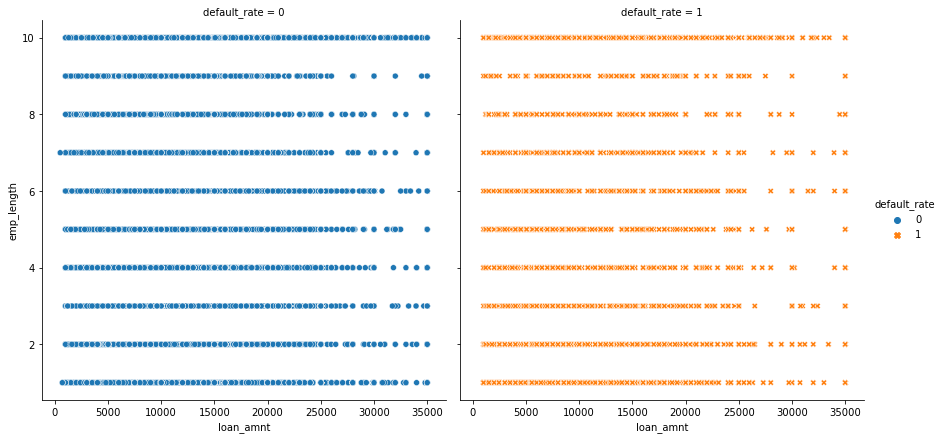

In [142]:
# Loan Amount to Work Experience relplot
sns.relplot(data=df, x='loan_amnt', y='emp_length',col="default_rate", hue="default_rate", style="default_rate",kind="scatter", height=6)
plt.show()

<b>Here we can see the defaulters and non defaulters with different work experience. Majority of the loans are taken by people who have experience between 1 and 2 years and 10 years and above but the default rate is also higher in those groups. Also there is a general trend that people with higher experience tend to take loans with bigger amounts and seldom there is a high chance that they default on those loans.</b>

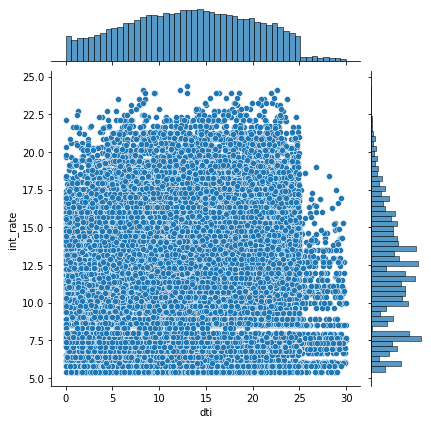

In [143]:
# DTI to interest rate jointplot
sns.jointplot(data=df, x='dti', y='int_rate')
plt.show()

In [144]:
# Loan Amount to Loan Issue Year barplot
plt.figure(figsize=(15,10)) 
sns.barplot('issue_year','default_rate', data=df ,hue='grade', estimator= sum)
plt.title('Issuance of Loans by Default Rate', fontsize=15)
plt.xlabel('Issue Year', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.show()

In [145]:
#BarPlot for Issue year vs Subgrade to Loan amount 
plt.figure(figsize=(20,10)) 
sns.barplot('issue_year','loan_amnt', data=df ,hue='sub_grade', estimator= sum)
plt.title('Issuance of Loans by Sub Grade', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total loan amount issued', fontsize=15)
plt.show()

In [146]:
#BarPlot for Term vs Default Rate Yearwise
plt.figure(figsize=(10,10)) 
sns.barplot('term','default_rate', data=df ,hue='issue_year', estimator= sum)
plt.title('Term vs Default Rate Yearwise', fontsize=15)
plt.xlabel('Term', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.show()

In [147]:
#BarPlot for Issue year vs Loan Amount to term by mean
plt.figure(figsize=(10,10)) 
sns.barplot('term','default_rate', data=df ,hue='issue_year', estimator= mean)
plt.title('Term vs Default Rate Yearwise on Average basis', fontsize=15)
plt.xlabel('Term', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.show()

<b>Here we can see yearwise default rate for both terms increases year on year basis when we look at the overall picture but when we see the average default rate we can clearly see that in 2007 we say the highest average defaults and for year 2010 and 2011 the 60 month term have higher default average than the 36 month term. </b>

In [148]:
#Group by issue year
df.groupby(by=(['issue_year'])).sum()

loan_amnt    term  int_rate  installment  emp_length  \
issue_year                                                         
2007            63625     252     76.36      2077.56          24   
2008          9628300   40032  12556.54    288292.42        4825   
2009         46414325  169668  57452.84   1551517.97       19963   
2010        119669950  475752 132038.58   3431114.70       56328   
2011        234748300  862956 239610.27   6691019.24      106028   

              annual_inc       dti  delinq_2yrs  pub_rec  revol_bal  \
issue_year                                                            
2007           394324.39     57.93            0        7      75308   
2008         71238882.58  13773.77          210      110   16002217   
2009        320912266.58  58318.75          621      215   64968296   
2010        780480815.18 145528.89         1581      627  145993611   
2011       1384320654.45 273507.73         2974     1037  265164603   

            revol_util  total_acc  total_pymnt  last_pymnt_amnt  \
issue_year                                                        
2007            430.90        148     59274.62         22342.74   
2008          50269.39      23149   9163377.23       1463582.55   
2009         213669.08      99926  50316755.78       9267519.92   
2010         543601.55     246257 128154671.22      26059808.97   
2011         997261.71     446225 254140665.94      66072379.88   

            pub_rec_bankruptcies  issue_month  default_rate  
issue_year                                                   
2007                           7           72             2  
2008                          87         8833           173  
2009                         142        35623           593  
2010                         448        80805          1411  
2011                         856       138358          3102

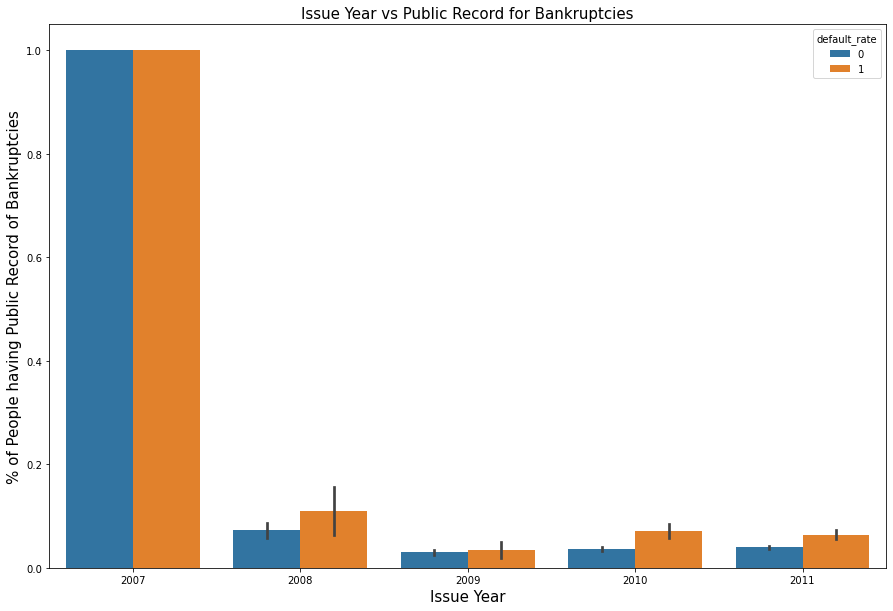

In [149]:
# issue_year vs pub_rec_bankruptcies wrt to default_rate
plt.figure(figsize=(15,10))
sns.barplot(x='issue_year',y='pub_rec_bankruptcies', hue='default_rate', data=df,estimator=mean)
plt.title('Issue Year vs Public Record for Bankruptcies', fontsize=15)
plt.xlabel('Issue Year', fontsize=15)
plt.ylabel('% of People having Public Record of Bankruptcies', fontsize=15)
plt.show()

<b>This graph shows us that the people who are declaring bankruptcies are more likely to default.</b>

In [150]:
#Heatmap Correlation for loan dataframe
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [151]:
#Pair Plots for loan dataframe
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

<Figure size 720x720 with 0 Axes>

In [152]:
# Other Interesting Graphs

In [153]:
# int_rate vs loan_amnt wrt to default_rate
sns.jointplot(data=df, x='int_rate', y='loan_amnt' , hue='default_rate')
plt.show()

In [154]:
# issue_year vs loan_amnt wrt to default_rate
sns.jointplot(data=df, x='issue_year', y='loan_amnt' , hue='default_rate')
plt.show()

In [155]:
# pub_rec vs loan_amnt wrt to default_rate
sns.jointplot(data=df, x='loan_amnt', y='pub_rec' , hue='default_rate')
plt.show()

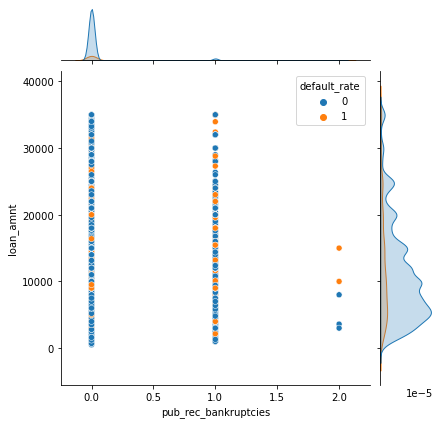

In [156]:
# pub_rec_bankruptcies vs loan_amnt wrt to default_rate
sns.jointplot(data=df, x='pub_rec_bankruptcies', y='loan_amnt' , hue='default_rate')
plt.show()

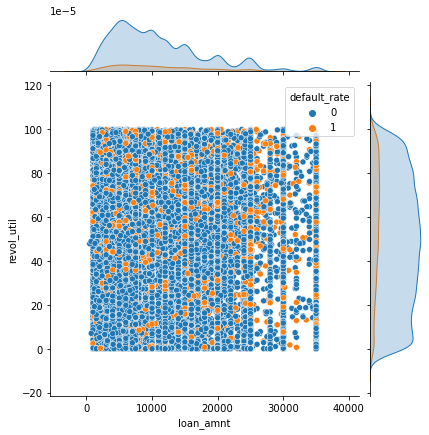

In [157]:
# revol_util vs loan_amnt wrt to default_rate
sns.jointplot(data=df, x='loan_amnt', y='revol_util' , hue='default_rate')
plt.show()

In [158]:
#Loan Amount vs Total Payment Made variable with a breakup of our target variable
sns.jointplot(data=df, x='loan_amnt', y='total_pymnt' , hue='loan_status')
plt.show()

In [159]:
#Loan Amount vs Installment variable with a breakup of our target variable
sns.relplot(data=df, x='loan_amnt', y='installment',col="default_rate", hue="default_rate", style="default_rate",kind="scatter", height=6)
plt.show()